# Parking Data Analytics
###### by Simon Huang (27067380)

## Questions
### Main question
* Are we able to predict the number of parking ticket given based on population density and urban factors?

### Minor questions
* Is there a monthly ticket quotas for agents issuing them?

## Data Set Sources
##### Los Angeles Parking Citations
https://www.kaggle.com/cityofLA/los-angeles-parking-citations

This dataset is constantly being updated on a daily basis. The version I have was downloaded on June 4, 2019. The data contains parking tickets issued in the city of LA since 2015. It also has the coordinates of where the ticket was given

##### 2010 Census Populations by Zip Code
https://data.lacity.org/dataset/2010-Census-Populations-by-Zip-Code/nxs9-385f

This is the most recent data set about Los Angeles' country population. The next census will happen in 2020. The data contains data about the total population, age, sex, and households

##### Zip Codes in Southern California
https://controllerdata.lacity.org/dataset/Zip-Code-Areas/9uax-58sb

This data contains the geometric area of all Zip codes in Southern California.

##### Los Angeles City Zip Codes
http://geohub.lacity.org/datasets/875d540d71e64b8696cc368865c2b640_0

This data contains only Zip codes of the city of Los Angeles. We will use this data to limit our data to the LA city area.

# Acquiring and Loading Data
The data cannot be fetched directly using the `urllib` module. We are assuming that all the data is available locally.

The data sets are placed in the following directories:

`data\raw\los-angeles-parking-citations\parking-citations.csv`

`data\raw\2010_Census_Populations_by_Zip_Code.csv`

`data\raw\Zip Code Areas.geojson`

`data\raw\Intersect_of_City_Boundary_and_Zip_Codes_LA_County.csv`

*Note that `parking-citations.csv` is very large (~1.3GB) and may take time to load*

In [1]:
# Initial setup
import pandas as pd
import numpy as np

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# For visuals
import seaborn as sns

# Removing scientific notation from prints for a better reading
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
parking_data = pd.read_csv("./data/raw/los-angeles-parking-citations/parking-citations.csv")
parking_data.head()

# Loading may take time. A warning may occur due to the large size of the .csv

C:\Users\Simon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.000,NaN,nan,CA,200304.000,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.000,4000A1,NO EVIDENCE OF REG,50.000,99999.000,99999.000
1,1103700150,2015-12-21T00:00:00,1435.000,NaN,nan,CA,201512.000,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.000,4000A1,NO EVIDENCE OF REG,50.000,99999.000,99999.000
2,1104803000,2015-12-21T00:00:00,2055.000,NaN,nan,CA,201503.000,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.000,8939,WHITE CURB,58.000,6439997.900,1802686.400
3,1104820732,2015-12-26T00:00:00,1515.000,NaN,nan,CA,nan,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.000,000,17104h,nan,6440041.100,1802686.200
4,1105461453,2015-09-15T00:00:00,115.000,NaN,nan,CA,200316.000,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.000,8069A,NO STOPPING/STANDING,93.000,99999.000,99999.000


In [3]:
population_data = pd.read_csv("./data/raw/2010_Census_Populations_by_Zip_Code.csv")
population_data.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.500,0,1,1,1.000
1,90001,57110,26.600,28468,28642,12971,4.400
2,90002,51223,25.500,24876,26347,11731,4.360
3,90003,66266,26.300,32631,33635,15642,4.220
4,90004,62180,34.800,31302,30878,22547,2.730


The zip code areas data is formatted in `geojson`. We need to use the `geopandas` module instead of the regular one.

`geopandas` can be installed using the command `conda install geopandas`

In [4]:
import geopandas as gpd

In [5]:
zip_data = gpd.read_file('./data/raw/Zip Code Areas.geojson')
zip_data.head()

,external_i,name,mtfcc10,display_na,intptlat10,set,awater10,slug,zcta5ce10,funcstat10,aland10,geoid10,kind,intptlon10,classfp10,geometry
0,90001,90001,G6350,90001 ZIP Code Tabulation Area (2012),+33.9740268,ZIP Code Tabulation Areas (2012),0,90001-zip-code-tabulation-area-2012,90001,S,9071359,90001,ZIP Code Tabulation Area (2012),-118.2495088,B5,(POLYGON ((-118.2651510000001 33.9702490000000...
1,90002,90002,G6350,90002 ZIP Code Tabulation Area (2012),+33.9490988,ZIP Code Tabulation Areas (2012),0,90002-zip-code-tabulation-area-2012,90002,S,7930684,90002,ZIP Code Tabulation Area (2012),-118.2467371,B5,(POLYGON ((-118.2373700000001 33.9585210000000...
2,90003,90003,G6350,90003 ZIP Code Tabulation Area (2012),+33.9641307,ZIP Code Tabulation Areas (2012),403,90003-zip-code-tabulation-area-2012,90003,S,9197637,90003,ZIP Code Tabulation Area (2012),-118.2727831,B5,(POLYGON ((-118.2651740000001 33.9818280000000...
3,90004,90004,G6350,90004 ZIP Code Tabulation Area (2012),+34.0761981,ZIP Code Tabulation Areas (2012),0,90004-zip-code-tabulation-area-2012,90004,S,7894525,90004,ZIP Code Tabulation Area (2012),-118.3107225,B5,(POLYGON ((-118.3116010000001 34.0689580000000...
4,90005,90005,G6350,90005 ZIP Code Tabulation Area (2012),+34.0591634,ZIP Code Tabulation Areas (2012),0,90005-zip-code-tabulation-area-2012,90005,S,2807559,90005,ZIP Code Tabulation Area (2012),-118.3068924,B5,(POLYGON ((-118.2916380000001 34.0617930000000...


In [6]:
la_city_zip = pd.read_csv('data/raw/Intersect_of_City_Boundary_and_Zip_Codes_LA_County.csv')
la_city_zip.head()

,OBJECTID,CITY,ZIPCODE,ZIP,TOOLTIP,NLA_URL,AnalysisArea
0,1,IN,90001,90001,Zip Code: 90001,n,0.928
1,2,IN,90002,90002,Zip Code: 90002,n,2.045
2,3,IN,90003,90003,Zip Code: 90003,n,3.682
3,4,IN,90004,90004,Zip Code: 90004,n,3.012
4,5,IN,90005,90005,Zip Code: 90005,n,1.324


# Data Wrangling

### Checking if any null values are present

In [7]:
parking_data.isnull().sum()

Ticket number                  0
Issue Date                   568
Issue time                  2925
Meter Id                 7031696
Marked Time              9163348
RP State Plate               765
Plate Expiry Date         866347
VIN                      9459249
Make                        9521
Body Style                  9930
Color                       4523
Location                     938
Route                      70783
Agency                       578
Violation code                 0
Violation Description       1011
Fine amount                 7126
Latitude                       4
Longitude                      4
dtype: int64

In [8]:
population_data.isnull().sum()

Zip Code                  0
Total Population          0
Median Age                0
Total Males               0
Total Females             0
Total Households          0
Average Household Size    0
dtype: int64

In [9]:
zip_data.isnull().sum()

external_i    0
name          0
mtfcc10       0
display_na    0
intptlat10    0
set           0
awater10      0
slug          0
zcta5ce10     0
funcstat10    0
aland10       0
geoid10       0
kind          0
intptlon10    0
classfp10     0
geometry      0
dtype: int64

In [10]:
la_city_zip.isnull().sum()

OBJECTID        0
CITY            0
ZIPCODE         0
ZIP             0
TOOLTIP         0
NLA_URL         0
AnalysisArea    0
dtype: int64

## Cleaning Parking Ticket Data

We notice that only `parking_data` has null values. 

However, not all missing values in this column are declared as NaN. 

For example, from a quick look on the `longitude` and `latitude`, some missing values are displayed as 99999

In [11]:
parking_data['Longitude'].value_counts()

99999.000      1400782
1819688.456       8610
1859071.166       7610
1882601.871       5720
1849114.300       5041
1859071.200       4795
1849114.334       4401
1836817.208       4326
1849114.334       4215
1864751.557       4196
1883363.553       3843
1852080.794       3560
1837269.893       3527
1845112.570       3521
1819197.428       3483
1876409.078       3481
1840433.993       3481
1849336.560       3397
1845451.300       3327
1845451.348       3305
1848423.248       3271
1858229.000       3222
1857542.012       3185
1857542.000       3185
1858835.417       3155
1859516.042       3089
1848423.200       3049
1882601.900       2995
1803997.602       2890
1819197.428       2866
                ...   
1832483.744          1
1840585.351          1
1934631.030          1
1903949.900          1
1848483.584          1
1883095.633          1
1861520.860          1
1801712.181          1
1839372.809          1
1903982.400          1
1844281.500          1
1808854.681          1
1869526.494

In [12]:
parking_data['Latitude'].value_counts()

99999.000      1400782
6463689.998       8616
6419828.962       8610
6463690.000       8374
6458312.392       7610
6462120.700       6857
6421105.622       6349
6463689.894       5991
6448999.196       5720
6461453.800       5642
6458312.400       4718
6463689.900       4430
6449300.792       4269
6457731.227       4252
6485641.284       4191
6470141.350       4043
6486945.410       3946
6449000.204       3843
6483074.281       3686
6457731.200       3671
6439920.110       3606
6427692.586       3494
6447001.322       3481
6421785.514       3481
6419538.332       3413
6486375.314       3403
6427279.079       3402
6457482.263       3397
6426797.900       3319
6418423.925       3284
                ...   
6467380.257          1
6472132.826          1
6501687.343          1
6473338.888          1
6461748.297          1
6435571.500          1
6475620.235          1
6435555.500          1
6463217.786          1
6435543.500          1
6435394.000          1
6466395.262          1
6435676.500

From the unique counts of longitude and latitude, we notice that there is an equal number of entries with the value of 99999

Also, since longitude and latitude describe a specific location (Los Angeles in our case), we can assume that those values should be close together within a certain range. Therefore, any values that are out of range would be considered erroneous

We can double check with quartiles, mean, min and max

In [13]:
parking_data['Longitude'].describe()

count      9475554.000
mean       1590978.489
std        1988562.739
min          99999.000
25%        1821960.801
50%        1842024.540
75%        1858208.220
max     4042322160.000
Name: Longitude, dtype: float64

In [14]:
parking_data['Latitude'].describe()

count      9475554.000
mean       5517048.968
std        2941144.952
min          99999.000
25%        6421784.451
50%        6451852.197
75%        6475138.037
max     4042322160.000
Name: Latitude, dtype: float64

From the data above, we notice that the values for 25%, 50%, and 75% quartiles are very close together. However, the minimum and maximum values are really far away from the quartiles. We can assume those values are erroneous.

For longitude, we can assume that the valid range should be in the 1 000 000 range

For latitude, we can assume that the valid range should be in the 6 000 000 range

In [15]:
len(parking_data[(parking_data['Latitude'] < 6000000) | 
             (parking_data['Latitude'] >= 7000000)]
   )

1400785

In [16]:
len(parking_data[(parking_data['Longitude'] < 1000000) | 
             (parking_data['Longitude'] >= 2000000)]
   )

1400952

In [17]:
len(parking_data)

9475558

From the results above, there would be around 1 400 000 invalid entries out of 9 400 000 entries. We can create a new variable with filtered out results. We can then do further cleaning from there.

In [18]:
parking_data_clean = parking_data[((parking_data['Latitude'] >= 6000000) &
                                 (parking_data['Latitude'] < 7000000)) |
                                 ((parking_data['Longitude'] >= 1000000) &
                                 (parking_data['Longitude'] < 2000000))]

In [19]:
parking_data_clean.isnull().sum()

Ticket number                  0
Issue Date                     0
Issue time                  1362
Meter Id                 5757395
Marked Time              7795803
RP State Plate               580
Plate Expiry Date         749403
VIN                      8059753
Make                        4740
Body Style                  4167
Color                       1667
Location                       0
Route                      35761
Agency                         5
Violation code                 0
Violation Description        390
Fine amount                 3032
Latitude                       0
Longitude                      0
dtype: int64

We notice that there are now no null values for latitude and longitude.

There are entries that contains a large amount of NaN but the column is not useful for the analysis of our questions. Rows such as `Meter Id`, `Marked Time`, `Plate Expiry Date`, `VIN`, and `Route` can be dropped.

In [20]:
parking_data_clean = parking_data_clean.drop(columns=['Meter Id', 'Marked Time', 'Plate Expiry Date', 'VIN', 'Route'])

From here, we can drop all NaN values since we have a very large data set

In [21]:
parking_data_clean = parking_data_clean.dropna()

In [22]:
parking_data_clean.isnull().sum()

Ticket number            0
Issue Date               0
Issue time               0
RP State Plate           0
Make                     0
Body Style               0
Color                    0
Location                 0
Agency                   0
Violation code           0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
dtype: int64

In [23]:
parking_data_clean['Ticket number'].duplicated().sum() # Checking for duplicates

0

There are no NaN values or duplicated entries in the parking data

In [24]:
parking_data_clean.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

There are values that has a wrong data type such as `Issue Date`(datetime64) `Issue Time`(int64), and `Agency`(int64)

In [25]:
parking_data_clean['Issue Date'] = parking_data_clean['Issue Date'].astype('datetime64')
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].astype('int64')
parking_data_clean['Agency'] = parking_data_clean['Agency'].astype('int64')
parking_data_clean.dtypes

Ticket number                    object
Issue Date               datetime64[ns]
Issue time                        int64
RP State Plate                   object
Make                             object
Body Style                       object
Color                            object
Location                         object
Agency                            int64
Violation code                   object
Violation Description            object
Fine amount                     float64
Latitude                        float64
Longitude                       float64
dtype: object

In [26]:
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
2,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400
33,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100
43,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000
44,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000
45,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500


## Cleaning and normalizing population data
We first check if the correct data types are used

In [27]:
population_data.dtypes

Zip Code                    int64
Total Population            int64
Median Age                float64
Total Males                 int64
Total Females               int64
Total Households            int64
Average Household Size    float64
dtype: object

The data types are correct for all the columns

In [28]:
population_data.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000,319.000,319.000,319.000,319.000,319.000,319.000
mean,91000.674,33241.342,36.528,16391.564,16849.777,10964.571,2.828
std,908.360,21644.417,8.693,10747.496,10934.986,6270.646,0.836
min,90001.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,90243.500,19318.500,32.400,9763.500,9633.500,6765.500,2.435
50%,90807.000,31481.000,37.100,15283.000,16202.000,10968.000,2.830
75%,91417.000,44978.000,41.000,22219.500,22690.500,14889.500,3.320
max,93591.000,105549.000,74.000,52794.000,53185.000,31087.000,4.670


The values seem to be consistent as there is a fluctuation between the population. The minimum value of 0 is justified as there are ZIP code areas where there are no residents

In [29]:
population_data[(population_data['Total Population'] == 0)]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
64,90079,0,0.000,0,0,0,0.000
66,90090,0,0.000,0,0,0,0.000
119,90506,0,0.000,0,0,0,0.000
153,90747,0,0.000,0,0,0,0.000
167,90831,0,0.000,0,0,0,0.000
252,91608,0,0.000,0,0,0,0.000


90079: Seems to be a mall in downtown LA

90090: Dodgers Stadium

90506: El Camino College

90747: California State University Dominguez Hills

90831: A block of commercial buildings

91608: A block of commercial buildings

From those results, we can see that some areas are not necessarily a residential area. This can skew some of our results in later analysis. We may need to determine the minimum amount of population before further analysis. 

The data seems to be cleaned and normalized for the moment

In [30]:
population_data_clean = population_data.copy()
population_data_clean.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.500,0,1,1,1.000
1,90001,57110,26.600,28468,28642,12971,4.400
2,90002,51223,25.500,24876,26347,11731,4.360
3,90003,66266,26.300,32631,33635,15642,4.220
4,90004,62180,34.800,31302,30878,22547,2.730


## Cleaning and normalizing ZIP data

The only columns that we are interested are the ZIP code and the geometry. We will use the geometry data to calculate the area and also check if any of the parking ticket location falls into the area, thus determining the ZIP code. From there, we have the population data of the ZIP code in `population_data_clean`

In [31]:
zip_data_clean = zip_data[['name', 'geometry']]

In [32]:
zip_data_clean.dtypes # Checking for correct data types

name        object
geometry    object
dtype: object

In [33]:
zip_data_clean['name'] = zip_data_clean['name'].astype('int64')

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
zip_data_clean.dtypes

name         int64
geometry    object
dtype: object

We have converted the ZIP data type to int64, the same data type from `population_data`

We are renaming `name` to `Zip Code` to match the column in `population_data`

In [35]:
zip_data_clean = zip_data_clean.rename(columns={'name':'Zip Code'})
zip_data_clean.head()

,Zip Code,geometry
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...


## Cleaning and normalizing Los Angeles Zip data

There are many columns we don't need for our analysis. The dataframe contains all the Zip code in L.A. We will use the data to filter out the Zip codes not in the area

In [36]:
la_city_zip.head()

,OBJECTID,CITY,ZIPCODE,ZIP,TOOLTIP,NLA_URL,AnalysisArea
0,1,IN,90001,90001,Zip Code: 90001,n,0.928
1,2,IN,90002,90002,Zip Code: 90002,n,2.045
2,3,IN,90003,90003,Zip Code: 90003,n,3.682
3,4,IN,90004,90004,Zip Code: 90004,n,3.012
4,5,IN,90005,90005,Zip Code: 90005,n,1.324


We are only interested in `ZIPCODE`The other columns can be dropped.

We will also rename the columns `ZIPCODE` to `Zip Code`

In [37]:
la_city_zip_clean = la_city_zip[['ZIPCODE']]
la_city_zip_clean = la_city_zip_clean.rename(columns = {'ZIPCODE': 'Zip Code'})
la_city_zip_clean.head()

,Zip Code
0,90001
1,90002
2,90003
3,90004
4,90005


## Enriching data about the population and zip codes

We now want to merge `zip_data_clean`, `la_city_zip_clean`, and `population_data_clean`.

`la_city_zip_clean` should be the primary DataFrame that we are interested in since it focuses only on Zip codes within the city of Los Angeles. It will act as a key.

We will first merge `zip_data_clean` with `population_data_clean`

We will be using geopanda's merge since there are polygon data

In [38]:
population_zip_merge = zip_data_clean.merge(population_data_clean, on='Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...,57110,26.600,28468,28642,12971,4.400
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...,51223,25.500,24876,26347,11731,4.360
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...,66266,26.300,32631,33635,15642,4.220
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...,62180,34.800,31302,30878,22547,2.730
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...,37681,33.900,19299,18382,15044,2.500


In [39]:
len(population_zip_merge)

319

There are currently 319 entries about the Zip code. We are only interested in Zip codes that are part of the city of Los Angeles so we will make an inner join with `la_city_zip_clean`

In [40]:
population_zip_merge = population_zip_merge.merge(la_city_zip_clean, on='Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...,57110,26.600,28468,28642,12971,4.400
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...,51223,25.500,24876,26347,11731,4.360
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...,66266,26.300,32631,33635,15642,4.220
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...,62180,34.800,31302,30878,22547,2.730
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...,37681,33.900,19299,18382,15044,2.500


In [41]:
len(population_zip_merge)

156

There are now 156 entries. They are Zip codes only in the city of L.A.

## Normalizing coordinate system

We need to convert the `geometry` column to a proper format for display

In our parking data tickets, the latitude and longitude and represented in an unconventional way. According to the website of the data provider: `Parking citations with latitude / longitude (XY) in US Feet coordinates according to the NAD_1983_StatePlane_California_V_FIPS_0405_Feet projection.`

After looking around, the original coordinate system is specified here: https://epsg.io/102645

The current representation of all polygon data in the `geometry` column of `population_zip_merge` is represented with WSG84 (EPSG:4326): https://spatialreference.org/ref/epsg/wgs-84/

We will convert all the polygon data from `EPSG:4326` to the representation used in ticket data.

Converting here is more efficient since we are working with a few hundreds of entries vs millions of entries

In [42]:
#PROJ.4 string from: https://epsg.io/102645

# Initial projection
population_zip_merge.crs = {'init' :'epsg:4326'}

# Converted projection
population_zip_merge = population_zip_merge.to_crs("+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")

population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500


## Further data enriching with parking ticket data: Associating a Zip code for each tickets

We want to see how many parking tickets are given depending on the area. We will run a script that we check every individual points and map them into their appropriate ZIP area.

We will use the `shaperly` module to help us plot the data and manipulate geopandas geometry.

`conda install -c conda-forge shapely`

In [43]:
from shapely.geometry import Point, MultiPolygon, Polygon

We create a function that will return `true` if a point is in the `polygon`, `false` otherwise

In [44]:
def point_is_in(lat, long, geometry):
    p1 = Point(lat, long)
    poly = MultiPolygon(geometry)
    return p1.within(poly)

Since we need to compare a single point to many polygons, using nested loops to compare all points to all polygons is extremely inefficient. We will use an R-tree data structure that will lower the time complexity.

In [45]:
from rtree import index

We populate the polygon data into the R-tree

In [46]:
idx = index.Index()

# Create spatial index
for i, r in population_zip_merge.iterrows():
    idx.insert(i, r['geometry'].bounds)

We create a function that will return the index of the polygon based on a point

In [47]:
def geometry_location(lat, long):
    # Intersection returns a list of possible polygons of the point
    # We will have to check each of them until we find the real intersection
    for x in list(idx.intersection((lat, long))):
        if point_is_in(lat, long, population_zip_merge['geometry'][x]):
            return population_zip_merge['Zip Code'][x]
            break
    return -1 # If there are no Zip code associated with the ticket

# geometry_location(6447406.010, 1896597.226)

We use the `apply` function to create a new row that we map the appropriate ZIP code to the ticket.

***Running the cell below may take over an hour***

To save time in the future, we will save the new `parking_data_clean` to the hard drive.

```
import time
start_time = time.time()

parking_data_clean['Zip Code'] = parking_data_clean.apply(lambda x: geometry_location(x.Latitude, x.Longitude), axis=1)

# Checking actual run time
print("--- %s seconds ---" % (time.time() - start_time))

# --- 2594.162664413452 seconds ---

parking_data_clean.to_csv('data/parking_data_clean_with_zip.csv')
```

We reload the data from the hard drive

In [48]:
parking_data_clean = pd.read_csv('data/parking_data_clean_with_zip.csv')
parking_data_clean = parking_data_clean.drop(columns='Unnamed: 0') # There was an issue with the original index
parking_data_clean.head()

C:\Users\Simon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code
0,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045
1,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606
2,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
3,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
4,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012


## Cleaning enriched parking data

Since the original function we used to map the Zip code returns `-1` if there are no Zip code found, there are a few invalid data.

We first check how many Zip codes have the value of `-1`

In [49]:
len(parking_data_clean[(parking_data_clean['Zip Code'] == -1)])

38718

We can safely drop all those rows

In [50]:
parking_data_clean = parking_data_clean.drop(parking_data_clean[parking_data_clean['Zip Code'] == -1].index)

We can confirm that all the selected rows are deleted

In [51]:
len(parking_data_clean[(parking_data_clean['Zip Code'] == -1)])

0

## Normalizing time for parking ticket data
For our exploratory analysis, we may be interested in the day and time of when the tickets are being issued.

The time display in `parking_data_clean` is not conventional, we will normalize that data.


We will add leading 0s so that `Issue time` has exactly 4 digits

In [52]:
# We need to convert the row into string in order to pad the time with extra 0
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].astype(str)
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].str.zfill(4)
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code
0,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045
1,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606
2,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
3,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
4,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012


After padding, we then can combine both date and time into a single column for easier processing

In [53]:
parking_data_clean['norm_datetime'] = pd.to_datetime(parking_data_clean['Issue Date'] + ' ' + parking_data_clean['Issue time'])
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code,norm_datetime
0,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00
1,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00
2,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00
3,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00
4,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00


We will also convert the `Issue time` column into a correct data type for time representation

In [54]:
parking_data_clean['Issue time'] = pd.to_datetime(parking_data_clean['Issue time'], format = '%H%M').dt.time
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code,norm_datetime
0,1104803000,2015-12-21,20:55:00,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00
1,1108321723,2015-12-21,10:41:00,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00
2,1109455266,2015-12-26,18:15:00,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00
3,1109455270,2015-12-27,18:15:00,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00
4,1109455745,2015-12-23,21:40:00,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00


We create additional columns that has individual data about the time for faster processing later on.

In [55]:
parking_data_clean['Weekday'] = pd.to_datetime(parking_data_clean['Issue Date']).dt.weekday_name
parking_data_clean['Hour'] = parking_data_clean['norm_datetime'].dt.hour
parking_data_clean['Year'] = parking_data_clean['norm_datetime'].dt.year
parking_data_clean['Month'] = parking_data_clean['norm_datetime'].dt.month
parking_data_clean['Day'] = parking_data_clean['norm_datetime'].dt.day
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,...,Fine amount,Latitude,Longitude,Zip Code,norm_datetime,Weekday,Hour,Year,Month,Day
0,1104803000,2015-12-21,20:55:00,CA,NISS,PA,BK,200 WORLD WAY,2,8939,...,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00,Monday,20,2015,12,21
1,1108321723,2015-12-21,10:41:00,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,...,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00,Monday,10,2015,12,21
2,1109455266,2015-12-26,18:15:00,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,...,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00,Saturday,18,2015,12,26
3,1109455270,2015-12-27,18:15:00,CA,INFI,PA,GY,3200 CANYON DR,36,8603,...,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00,Sunday,18,2015,12,27
4,1109455745,2015-12-23,21:40:00,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,...,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00,Wednesday,21,2015,12,23


## Splitting parking data into years
The data we have aquired ranges from late 2015 to mid 2019. We will split the data in full year while discarding data from years that are not complete. In the end, we should have a dataframe for 2016, 2017, and 2018.

In [56]:
parking_data_clean_2016 = parking_data_clean[(parking_data_clean['Year'] == 2016)]
parking_data_clean_2017 = parking_data_clean[(parking_data_clean['Year'] == 2017)]
parking_data_clean_2018 = parking_data_clean[(parking_data_clean['Year'] == 2018)]
print("# entries for 2016: " + str(len(parking_data_clean_2016)))
print("# entries for 2017: " + str(len(parking_data_clean_2017)))
print("# entries for 2018: " + str(len(parking_data_clean_2018)))

# entries for 2016: 1853338
# entries for 2017: 2139097
# entries for 2018: 1760280


## New data retrieval and further data enrichement for population: Adding new demographics data to Zip codes
The current data we have is not enough to have a clear idea of the demographics of the zip code. The 2010 US census data is hard to obtain directly but a website offers the information through their API. However, the requests are limited to 250 a month but we only need around 160.

We will fetch the data and store it on our local drive so we can process them later.

```
import requests
import json

API_KEY = '' # Removed for privacy

for i in list(population_zip_merge['Zip Code']):
    zip_req = requests.get('http://api.zip-codes.com/ZipCodesAPI.svc/1.0/GetZipCodeDetails/{0}?key={1}'.format(i, API_KEY))
    zip_data = zip_req.json()
    with open('./data/raw/zip/{0}.json'.format(i), 'w') as f:
        json.dump(zip_data, f)
```

After fetching the data, we will merge all the files we have into a single data frame

In [57]:
zip_detail_raw = pd.DataFrame()

for i in list(population_zip_merge['Zip Code']):
    entry = pd.read_json('data/raw/zip/{0}.json'.format(i))
    entry = entry.transpose()
    zip_detail_raw = pd.concat([zip_detail_raw, entry], axis=0, sort=True)

zip_detail_raw = zip_detail_raw.reset_index(drop=True)
zip_detail_raw.head()

,AreaCode,AreaCodeTemp,AreaCodeTest,AreaLand,AreaWater,AsianPop,AverageFamilySize,AverageHouseValue,BlackPop,Bus03Employment,...,StateFIPS,TimeZone,UniqueZIPName,WhitePop,ZipCode,ZipCodePopulation,_109thArea,_109thDistrict,_110thArea,_110thDistrict
0,323,None,None,3.502000,0.000000,259,4.53,272200.00,6420,10528,...,06,8,None,22256,90001,57110,0,0,57.69|72.03|79.36,40|43|44
1,323/562,None,None,3.062000,0.000000,265,4.59,248200.00,13628,1536,...,06,8,None,15825,90002,51223,0,0,57.69|72.03|79.36,40|43|44
2,323,None,None,3.551000,0.000000,307,4.45,268500.00,16829,6088,...,06,8,None,21741,90003,66266,0,0,55.26|57.69|72.03,37|40|43
3,323,None,None,3.048000,0.000000,17433,3.37,838000.00,2640,8429,...,06,8,None,25456,90004,62180,0,0,218.45|288.58|47.66,28|33|34
4,323/213/310/818/626,None,None,1.084000,0.000000,13078,3.22,672600.00,2287,6224,...,06,8,None,12338,90005,37681,0,0,218.45|288.58|47.66|55.26,28|33|34|37


We will check which columns might be interesting for our analysis

In [58]:
zip_detail_raw.columns.values

array(['AreaCode', 'AreaCodeTemp', 'AreaCodeTest', 'AreaLand',
       'AreaWater', 'AsianPop', 'AverageFamilySize', 'AverageHouseValue',
       'BlackPop', 'Bus03Employment', 'Bus03EmploymentFlag',
       'Bus03Establishments', 'Bus03PayrollAnnual',
       'Bus03PayrollQuarter1', 'CBSA', 'CBSADivPop2003', 'CBSAPop2003',
       'CBSA_DIV', 'CBSA_DIV_Name', 'CBSA_Name', 'CBSA_Type', 'CSA',
       'CSAName', 'CarrierRouteRateSortation', 'City', 'CityAliasAbbr',
       'CityAliasName', 'CityAliasType', 'CityAliases',
       'CityDeliveryIndicator', 'CityStateKey', 'CityType',
       'Classification', 'CountiesArea', 'CountyANSI', 'CountyFIPS',
       'CountyName', 'DayLightSaving', 'DeliveryActive', 'DeliveryBox',
       'DeliveryBusiness', 'DeliveryMFDU', 'DeliveryResidential',
       'DeliverySFDU', 'DeliverySpecial', 'Division', 'Elevation',
       'FacilityCode', 'FemalePop', 'FinanceNumber',
       'GrowthHousingUnits2003', 'GrowthHousingUnits2004',
       'GrowthIncreaseNumber', 'Gro

We might be interested in (The description of the columns can be found at zip-codes.com):

- ZipCode
- AverageHouseValue
- IncomePerHousehold
- AreaLand
- AreaWater
- Bus03Establishments **:Number of businesses**
- Bus03Employment **:Number of employees**
- DeliverySFDU **Single Family Delivery Units: Analogous to homes**
- DeliveryMFDU **Multi Family Delivery Units: Analogous to appartments**

In [59]:
zip_detail_filter = zip_detail_raw[['ZipCode', 
                                    'AverageHouseValue', 
                                    'IncomePerHousehold', 
                                    'AreaLand', 
                                    'AreaWater', 
                                    'Bus03Establishments', 
                                    'Bus03Employment', 
                                    'DeliverySFDU', 
                                    'DeliveryMFDU']]
#Renaming colums
zip_detail_filter = zip_detail_filter.rename(columns={'ZipCode':'Zip Code',
                                                     'AverageHouseValue': 'Average House Value',
                                                     'IncomePerHousehold': 'Income Per Household',
                                                     'AreaLand': 'Area Land',
                                                     'AreaWater': 'Area Water',
                                                     'Bus03Establishments': 'Number of businesses',
                                                     'Bus03Employment': 'Number of employees',
                                                     'DeliverySFDU': 'Number of homes',
                                                     'DeliveryMFDU': 'Number of appartments'})
zip_detail_filter.head()

,Zip Code,Average House Value,Income Per Household,Area Land,Area Water,Number of businesses,Number of employees,Number of homes,Number of appartments
0,90001,272200.00,34323.00,3.502000,0.000000,586,10528,11935,1048
1,90002,248200.00,32520.00,3.062000,0.000000,171,1536,10642,1182
2,90003,268500.00,31878.00,3.551000,0.000000,429,6088,13903,3589
3,90004,838000.00,43180.00,3.048000,0.000000,1147,8429,6715,16747
4,90005,672600.00,31485.00,1.084000,0.000000,718,6224,1496,15126


We check if there are any null values

In [60]:
zip_detail_filter.isnull().sum()

Zip Code                 0
Average House Value      0
Income Per Household     0
Area Land                0
Area Water               0
Number of businesses     0
Number of employees      0
Number of homes          0
Number of appartments    0
dtype: int64

We check the data types

In [61]:
zip_detail_filter.dtypes

Zip Code                 object
Average House Value      object
Income Per Household     object
Area Land                object
Area Water               object
Number of businesses     object
Number of employees      object
Number of homes          object
Number of appartments    object
dtype: object

We notice that all the fields are objects. We will convert the data types into the correct ones.

In [62]:
zip_detail_filter['Zip Code'] = zip_detail_filter['Zip Code'].astype('int64')
zip_detail_filter['Average House Value'] = zip_detail_filter['Average House Value'].astype('float64')
zip_detail_filter['Income Per Household'] = zip_detail_filter['Income Per Household'].astype('float64')
zip_detail_filter['Area Land'] = zip_detail_filter['Area Land'].astype('float64')
zip_detail_filter['Area Water'] = zip_detail_filter['Area Water'].astype('float64')
zip_detail_filter['Number of businesses'] = zip_detail_filter['Number of businesses'].astype('int64')
zip_detail_filter['Number of employees'] = zip_detail_filter['Number of employees'].astype('int64')
zip_detail_filter['Number of homes'] = zip_detail_filter['Number of homes'].astype('int64')
zip_detail_filter['Number of appartments'] = zip_detail_filter['Number of appartments'].astype('int64')

zip_detail_filter.dtypes

Zip Code                   int64
Average House Value      float64
Income Per Household     float64
Area Land                float64
Area Water               float64
Number of businesses       int64
Number of employees        int64
Number of homes            int64
Number of appartments      int64
dtype: object

We will merge this data with `population_merge_zip`

In [63]:
population_zip_merge = population_zip_merge.merge(zip_detail_filter, on = 'Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Average House Value,Income Per Household,Area Land,Area Water,Number of businesses,Number of employees,Number of homes,Number of appartments
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,272200.000,34323.000,3.502,0.000,586,10528,11935,1048
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,248200.000,32520.000,3.062,0.000,171,1536,10642,1182
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,268500.000,31878.000,3.551,0.000,429,6088,13903,3589
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,838000.000,43180.000,3.048,0.000,1147,8429,6715,16747
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,672600.000,31485.000,1.084,0.000,718,6224,1496,15126


## Adding the ticket counts for each Zip code depending on the year

We will sum up the ticket data count and create a new column in the population data

In [64]:
zip_counts_2016 = parking_data_clean_2016['Zip Code'].value_counts().rename_axis('Zip Code').reset_index(name='counts')
zip_counts_2017 = parking_data_clean_2017['Zip Code'].value_counts().rename_axis('Zip Code').reset_index(name='counts')
zip_counts_2018 = parking_data_clean_2018['Zip Code'].value_counts().rename_axis('Zip Code').reset_index(name='counts')

In [65]:
print(zip_counts_2016.head())
print(zip_counts_2017.head())
print(zip_counts_2018.head())

   Zip Code  counts
0     90028  106922
1     90015   71502
2     90291   67490
3     90025   61194
4     90036   59450
   Zip Code  counts
0     90028   95821
1     90015   73465
2     90291   70656
3     90025   66516
4     90036   65628
   Zip Code  counts
0     90028   80659
1     90015   59054
2     90025   55011
3     90291   54572
4     90036   54470


We will now merge the 3 dataframes into the population data

In [66]:
population_zip_merge = population_zip_merge.merge(zip_counts_2016, on='Zip Code')
population_zip_merge = population_zip_merge.rename(columns={'counts': 'Ticket Count 2016'})
population_zip_merge = population_zip_merge.merge(zip_counts_2017, on='Zip Code')
population_zip_merge = population_zip_merge.rename(columns={'counts': 'Ticket Count 2017'})
population_zip_merge = population_zip_merge.merge(zip_counts_2018, on='Zip Code')
population_zip_merge = population_zip_merge.rename(columns={'counts': 'Ticket Count 2018'})

population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Average House Value,Income Per Household,Area Land,Area Water,Number of businesses,Number of employees,Number of homes,Number of appartments,Ticket Count 2016,Ticket Count 2017,Ticket Count 2018
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,272200.000,34323.000,3.502,0.000,586,10528,11935,1048,2342,2695,2500
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,248200.000,32520.000,3.062,0.000,171,1536,10642,1182,4772,7801,5925
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,268500.000,31878.000,3.551,0.000,429,6088,13903,3589,13474,17991,15276
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,838000.000,43180.000,3.048,0.000,1147,8429,6715,16747,54124,61722,50947
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,672600.000,31485.000,1.084,0.000,718,6224,1496,15126,20045,23883,20422


## Calculating the population density

From our data, we have the total population and the land area. We can calculate the population density. The density is represented per square mile

In [67]:
population_zip_merge['Density'] = np.divide(population_zip_merge['Total Population'], population_zip_merge['Area Land'])

### Checking for odd values in density

In [68]:
population_zip_merge['Density'].describe()

count     132.000
mean    10572.617
std      7866.697
min         0.000
25%      5440.702
50%      9891.940
75%     13863.961
max     50787.810
Name: Density, dtype: float64

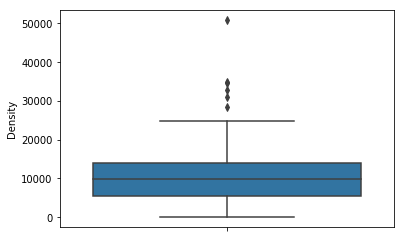

In [69]:
 sns.boxplot(population_zip_merge['Density'], orient='v')

Most of the values fall in a reasonable range and outliers can be justified since some Zip code zones are smaller and have lots of population

# Final dataframes for analysis

We have produced 2 main dataframes that we will use for further analysis: `population_zip_merge` and `parking_data_clean_2018`. Due to time restriction of this project, we will give a primary focus on the year 2018.


Most of the data visualization will be done with `population_zip_merge`. The data is from the 2010 census.
There is an 8 year gap between the parking ticket data and the population data so we should be careful with the results. There are no updated data about the population because the next census is in 2020.

In [70]:
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Average House Value,Income Per Household,Area Land,Area Water,Number of businesses,Number of employees,Number of homes,Number of appartments,Ticket Count 2016,Ticket Count 2017,Ticket Count 2018,Density
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,272200.000,34323.000,3.502,0.000,586,10528,11935,1048,2342,2695,2500,16307.824
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,248200.000,32520.000,3.062,0.000,171,1536,10642,1182,4772,7801,5925,16728.609
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,268500.000,31878.000,3.551,0.000,429,6088,13903,3589,13474,17991,15276,18661.222
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,838000.000,43180.000,3.048,0.000,1147,8429,6715,16747,54124,61722,50947,20400.262
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,672600.000,31485.000,1.084,0.000,718,6224,1496,15126,20045,23883,20422,34761.070


In [71]:
parking_data_clean_2018.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,...,Fine amount,Latitude,Longitude,Zip Code,norm_datetime,Weekday,Hour,Year,Month,Day
3075011,4320468924,2018-01-13,00:26:00,CA,MERZ,PA,BL,5033 LINCOLN AVE,56,80.69B,...,73.000,6499186.186,1866283.708,90042,2018-01-13 00:26:00,Saturday,0,2018,1,13
3075012,4320468935,2018-01-13,00:27:00,CA,MERZ,PA,BL,5033 LINCOLN AVE,56,5200,...,25.000,6499186.186,1866283.708,90042,2018-01-13 00:27:00,Saturday,0,2018,1,13
3075013,4320468946,2018-01-13,00:27:00,CA,FORD,PA,SL,5033 LINCOLN AVE,56,80.69B,...,73.000,6499186.186,1866283.708,90042,2018-01-13 00:27:00,Saturday,0,2018,1,13
3075014,4320468950,2018-01-13,00:28:00,CA,FORD,PA,BL,5033 LINCOLN AVE,56,80.69B,...,73.000,6499186.186,1866283.708,90042,2018-01-13 00:28:00,Saturday,0,2018,1,13
3075015,4320468961,2018-01-13,00:29:00,CA,TOYT,PA,BK,5033 LINCOLN AVE,56,80.69B,...,73.000,6499186.186,1866283.708,90042,2018-01-13 00:29:00,Saturday,0,2018,1,13


# Exploratory Data Analysis

## Numbers of ticket given per hour during the week

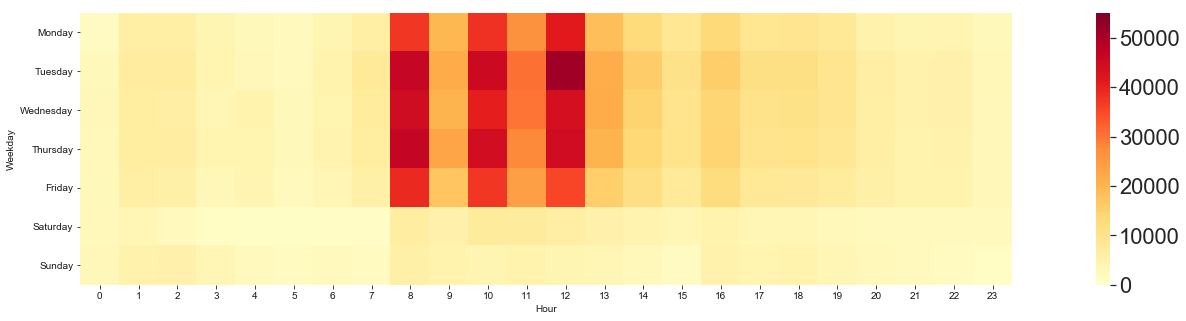

In [72]:
# https://www.freecodecamp.org/news/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51/
# https://dfrieds.com/data-visualizations/when-use-heatmaps
all_tickets = parking_data_clean_2018.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Create a custom sort since it sort by alphabetical order by default
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
all_tickets['Weekday'] = pd.Categorical(all_tickets['Weekday'],categories=weekdays)
all_tickets.sort_values('Weekday')

fig, ax = plt.subplots(figsize=(30,5))
sns.set(font_scale=2)
sns.heatmap(all_tickets.pivot('Weekday', 'Hour', 'count'), 
            square=True, 
            cmap='YlOrRd', 
            vmin=0, 
            vmax=55000)

## Numbers of tickets per day every month

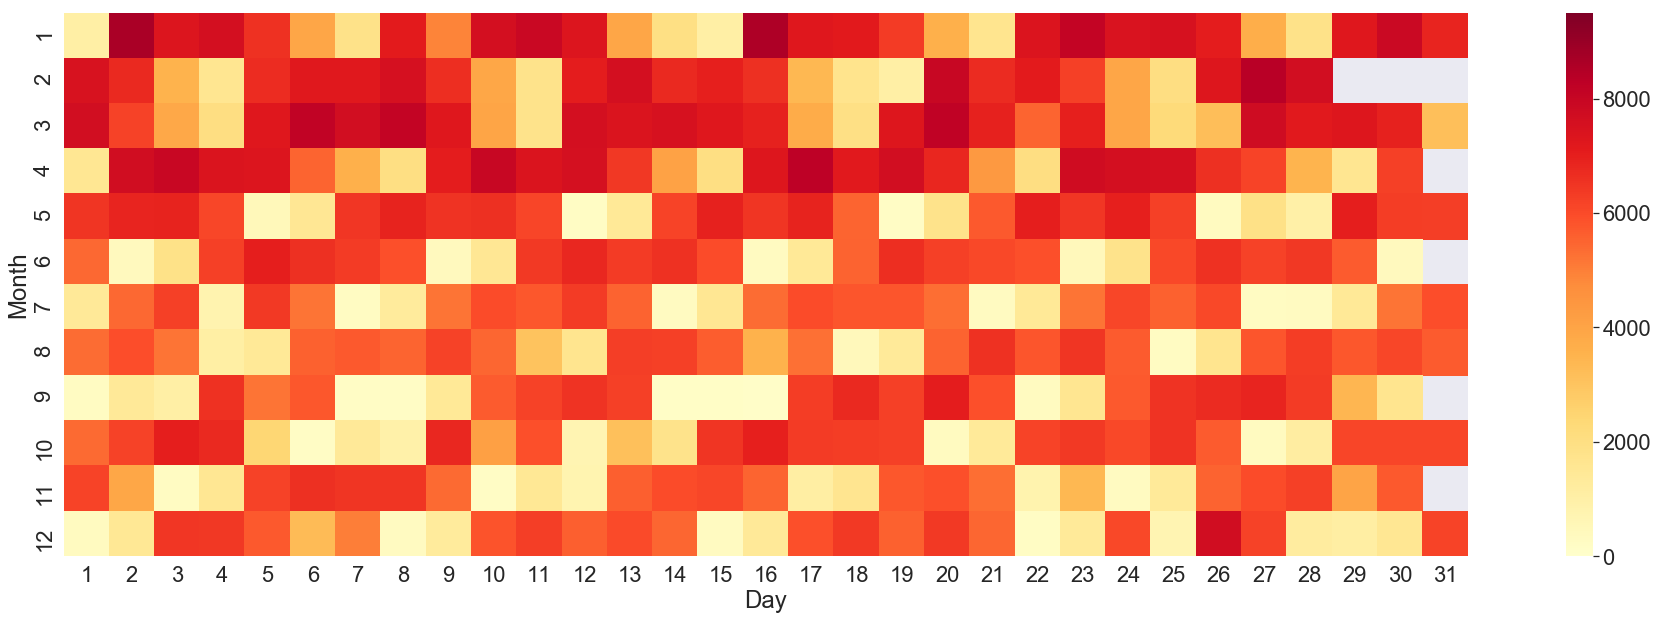

In [73]:
all_tickets_monthly = parking_data_clean_2018.groupby(['Month', 'Day']).size().reset_index(name = 'count')
fig, ax = plt.subplots(figsize=(35,10))
sns.set(font_scale=2)
sns.heatmap(all_tickets_monthly.pivot('Month', 'Day', 'count'), 
            square=True, 
            cmap='YlOrRd', 
            vmin=0, 
            vmax=9500)

## The mean of tickets given every day

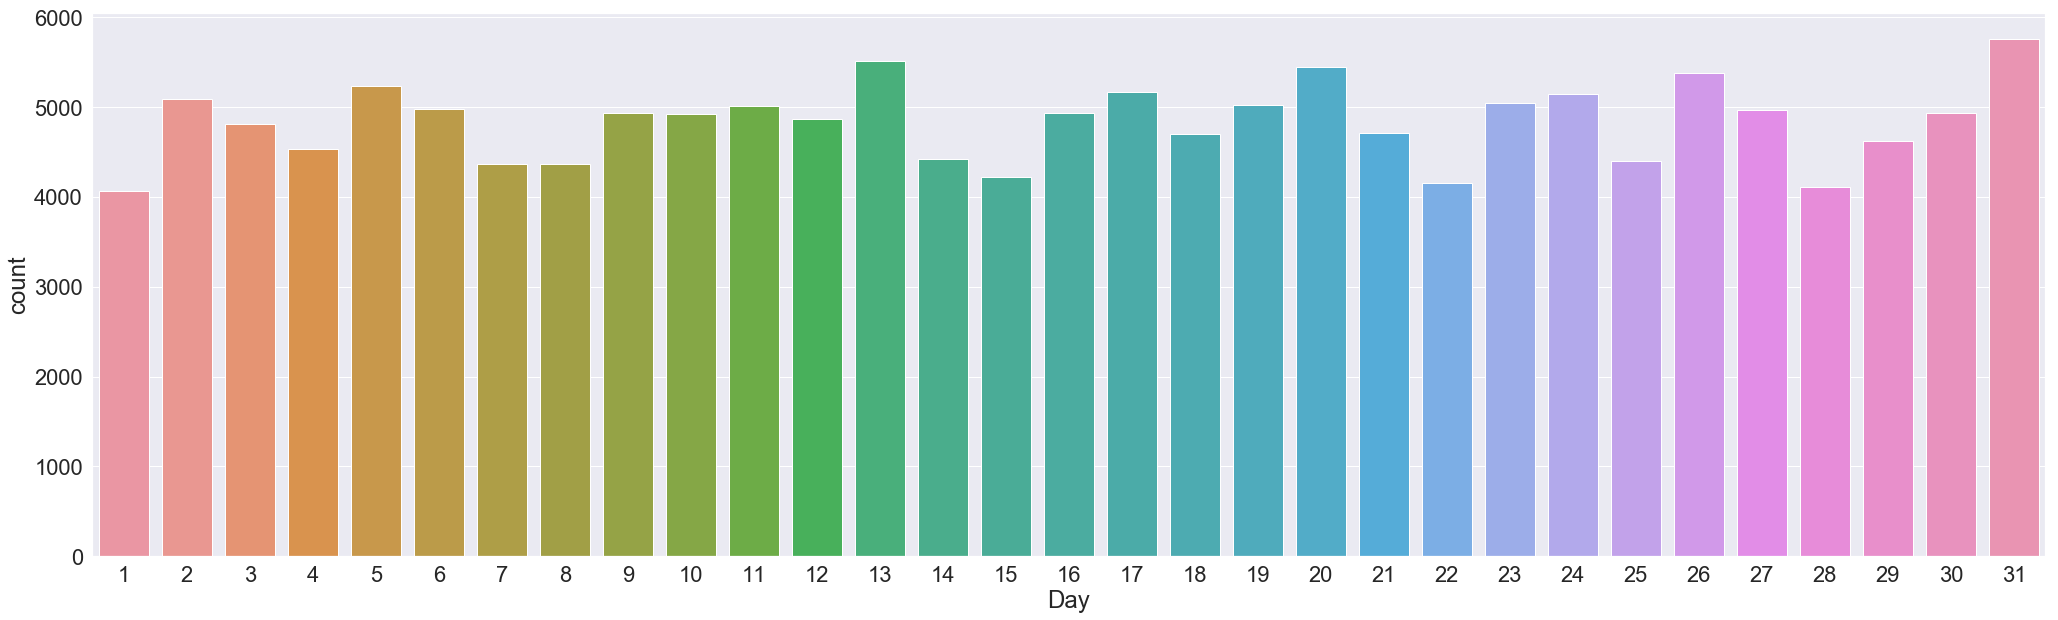

In [74]:
fig, ax = plt.subplots(figsize=(35,10))
sns.set(font_scale=3)
sns.barplot(data=all_tickets_monthly, x='Day', y='count', estimator=np.mean, ci=None)

## Number of tickets given every weekday per month

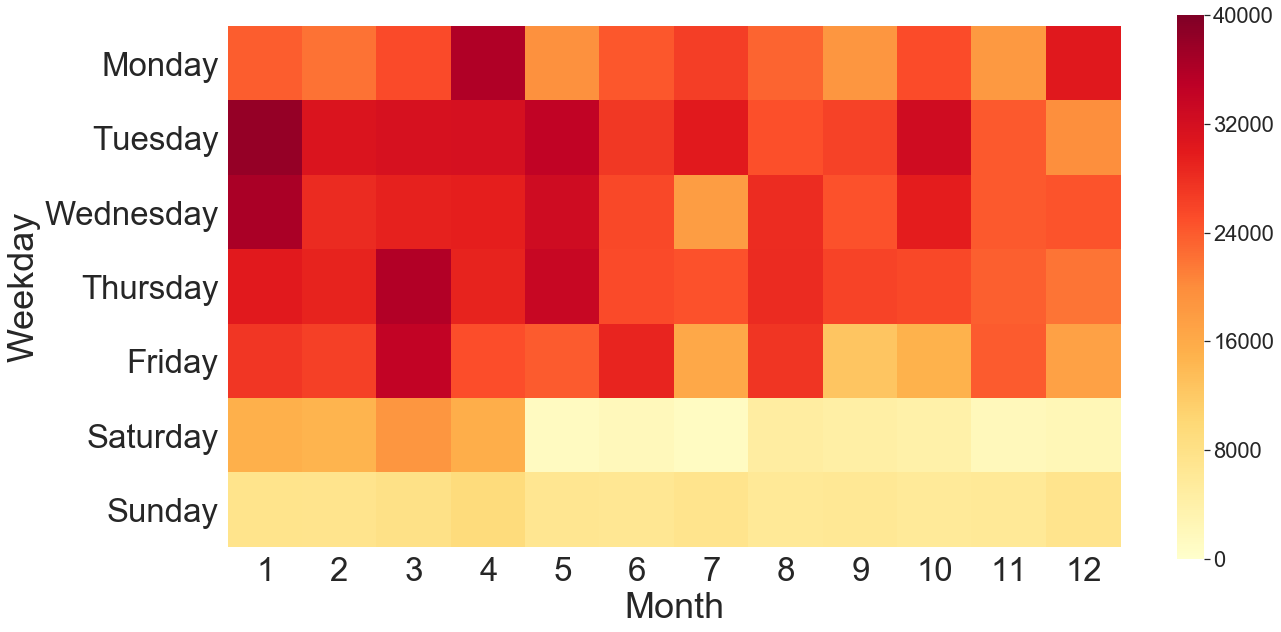

In [75]:
all_tickets_weekday = parking_data_clean_2018.groupby(['Month', 'Weekday']).size().reset_index(name = 'count')

# Create a custom sort since it sort by alphabetical order by default
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
all_tickets_weekday['Weekday'] = pd.Categorical(all_tickets_weekday['Weekday'],categories=weekdays)
all_tickets_weekday.sort_values('Weekday')

fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
sns.heatmap(all_tickets_weekday.pivot('Weekday', 'Month', 'count'), square=True, cmap='YlOrRd', vmin=0, vmax=40000)

## Top reason parking tickets are issued
We will limit the display to the top 10 violations since there are too many values to be displayed properly

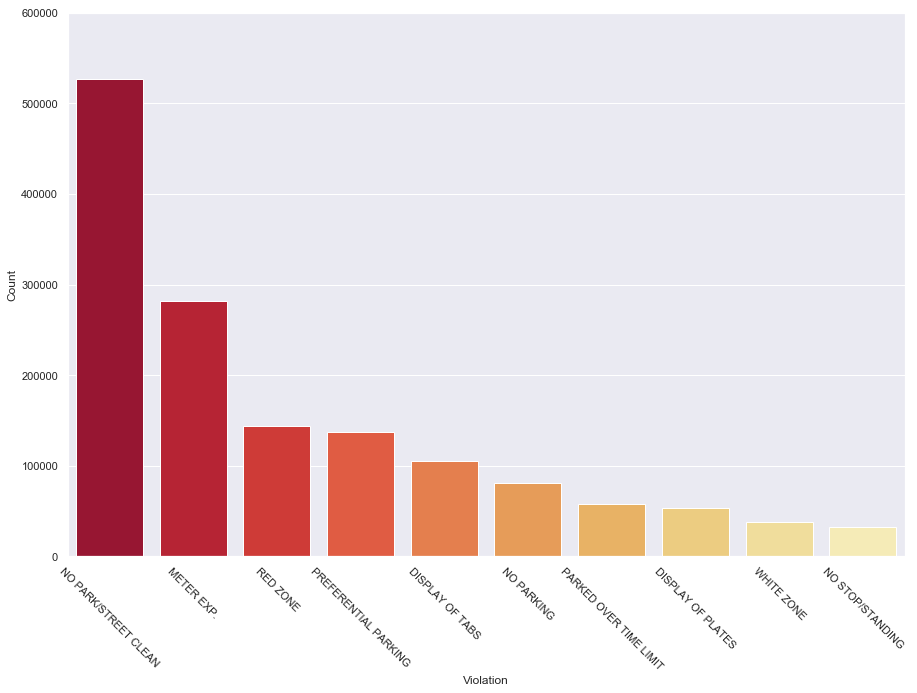

In [76]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,10))


all_violation = parking_data_clean_2018['Violation Description'].value_counts().rename_axis('Violation').reset_index(name='Count').head(10)
all_violation_plot = sns.barplot(data=all_violation, 
            x='Violation', 
            y='Count', 
            palette='YlOrRd_r')

# Rotate the x label to 45 degrees
all_violation_plot.set_xticklabels(all_violation_plot.get_xticklabels(), rotation=-45)

all_violation_plot.set(ylim=(0, 600000))
all_violation_plot

In [77]:
parking_data_clean_2018['Violation Description'].value_counts().head(25)

NO PARK/STREET CLEAN              527509
METER EXP.                        282230
RED ZONE                          143529
PREFERENTIAL PARKING              137045
DISPLAY OF TABS                   105490
NO PARKING                         81182
PARKED OVER TIME LIMIT             58338
DISPLAY OF PLATES                  53376
WHITE ZONE                         38412
NO STOP/STANDING                   32160
BLOCKING DRIVEWAY                  25427
STANDNG IN ALLEY                   22787
NO STOPPING/ANTI-GRIDLOCK ZONE     21407
NO STOP/STAND                      18385
YELLOW ZONE                        17947
STOP/STAND PROHIBIT                17655
FIRE HYDRANT                       15281
PARKED ON SIDEWALK                 14494
18 IN. CURB/2 WAY                  14241
EXCEED 72HRS-ST                    13707
DOUBLE PARKING                     12789
OFF STR/OVERTIME/MTR               11196
OUTSIDE LINES/METER                 8275
PARKED IN PARKWAY                   7330
COMM VEH OVER TI

## When "NO PARK/STREET CLEAN" tickets are given?

A big proportion of the tickets are from the NO PARK/STREET CLEAN category. We will see further how it affects the data

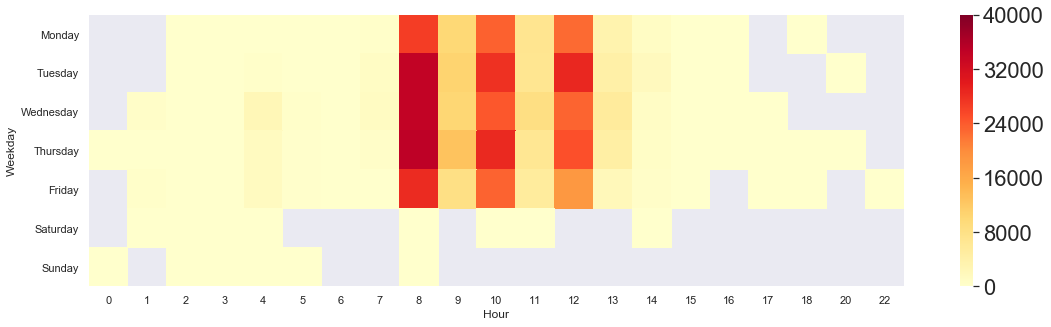

In [78]:
# Filter out reason
street_clean = parking_data_clean_2018[(parking_data_clean_2018['Violation Description'] == 'NO PARK/STREET CLEAN')]

# Grouping
street_clean_group = street_clean.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Sorting weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
street_clean_group['Weekday'] = pd.Categorical(street_clean_group['Weekday'],categories=weekdays)
street_clean_group.sort_values('Weekday')

# Create heatmap
fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale=2)
sns.heatmap(street_clean_group.pivot('Weekday', 'Hour', 'count'), square=True, cmap='YlOrRd', vmin=0, vmax=40000)

## When are the other parking tickets given?

We will filter out NO PARK/STREET CLEAN and see the other tickets

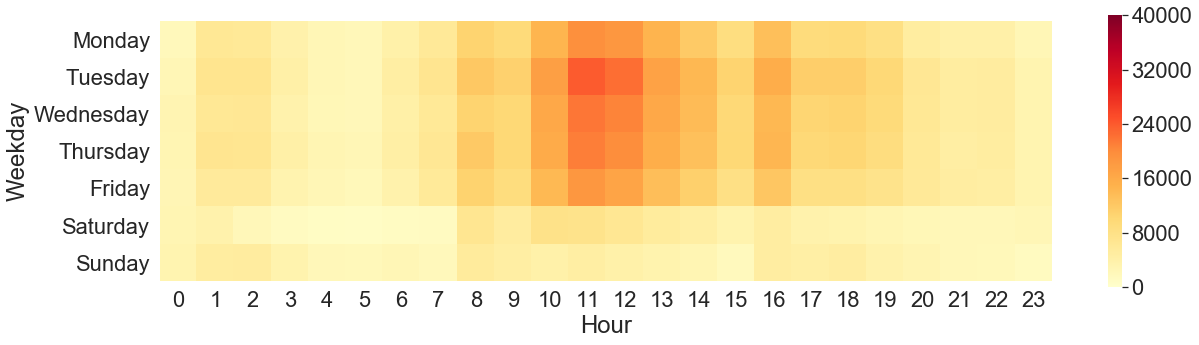

In [79]:
# Filter out reason
other_park_reasons = parking_data_clean_2018[(parking_data_clean_2018['Violation Description'] != 'NO PARK/STREET CLEAN')]

# Grouping
other_park_reasons_group = other_park_reasons.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Sorting weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
other_park_reasons_group['Weekday'] = pd.Categorical(other_park_reasons_group['Weekday'],categories=weekdays)
other_park_reasons_group.sort_values('Weekday')

# Create heatmap
fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale=2)
sns.heatmap(other_park_reasons_group.pivot('Weekday', 'Hour', 'count'), square=True, cmap='YlOrRd', vmin=0, vmax=40000)

## Checking the relationship between two variables

We will display the scatter plot and the Pearson correlation coefficient.

Note that we are using `population_zip_merge` which has 132 entries.

### The numbers of tickets per Zip code area

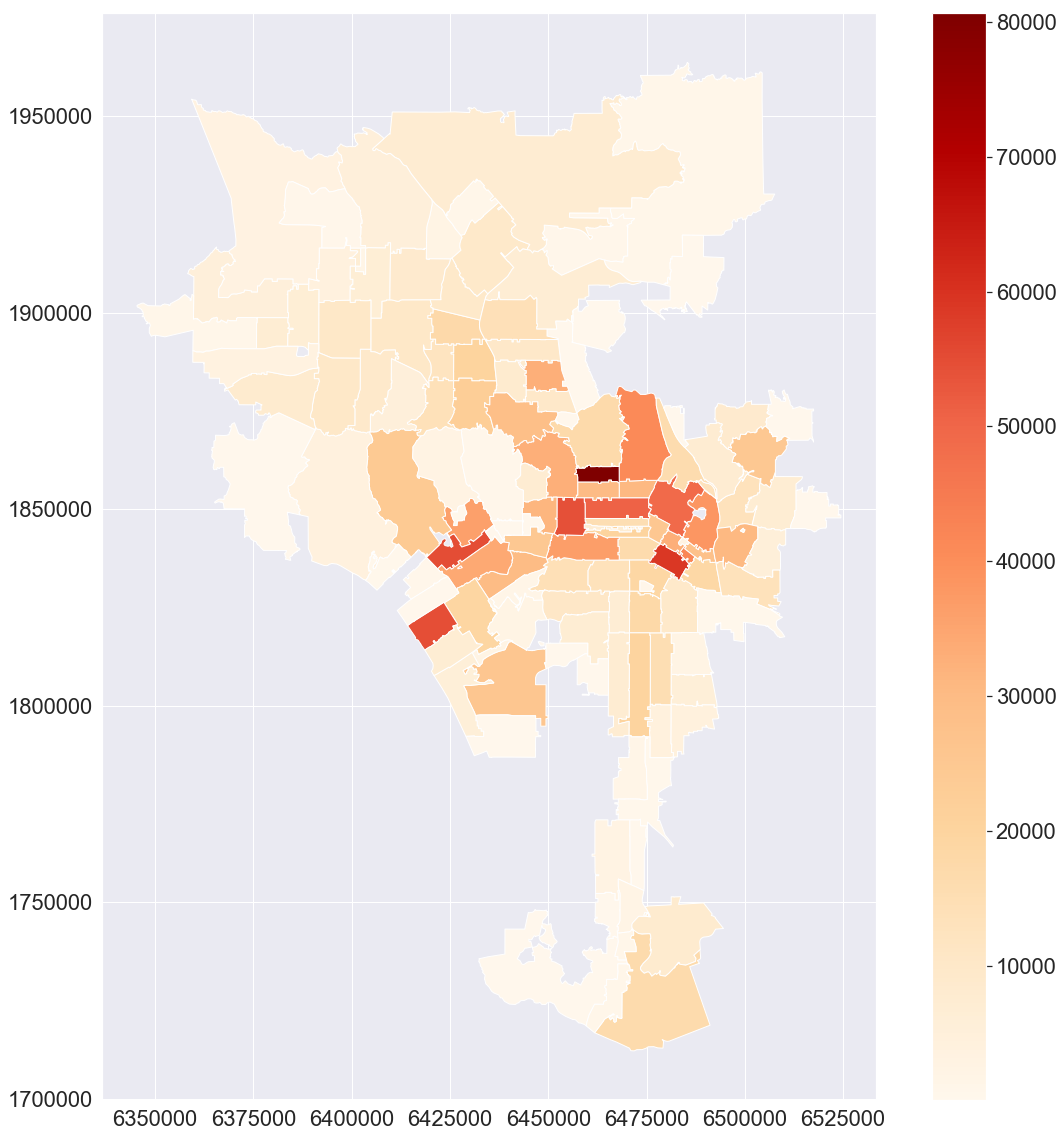

In [80]:
population_zip_merge.plot(column='Ticket Count 2018', figsize=(20,20), legend=True, cmap='OrRd')

### The number of businesses and the ticket count

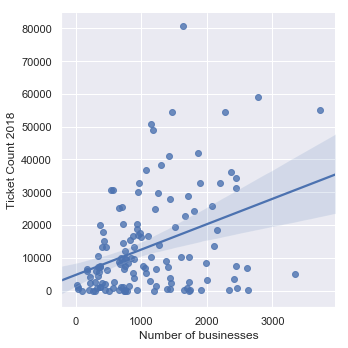

In [81]:
sns.set(font_scale=1)
sns.lmplot(data=population_zip_merge, x='Number of businesses', y='Ticket Count 2018')

In [82]:
population_zip_merge['Number of businesses'].corr(population_zip_merge['Ticket Count 2018'])

0.37401551426584734

### The number of employees and the ticket count

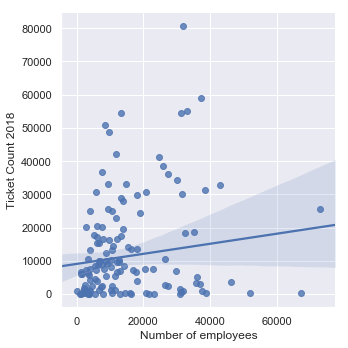

In [83]:
sns.lmplot(data=population_zip_merge, x='Number of employees', y='Ticket Count 2018', robust=True)

In [84]:
population_zip_merge['Number of employees'].corr(population_zip_merge['Ticket Count 2018'])

0.20384275051287515

### The number of homes and the ticket count

Homes are single-family detached homes

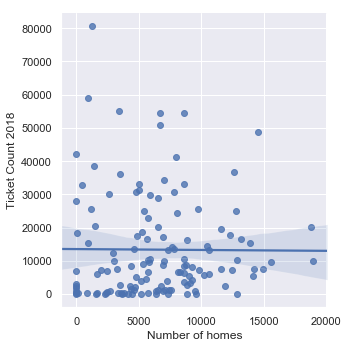

In [85]:
sns.set(rc={'figure.figsize':(10,10)})
sns.lmplot(data=population_zip_merge, x='Number of homes', y='Ticket Count 2018')

In [86]:
population_zip_merge['Number of homes'].corr(population_zip_merge['Ticket Count 2018'])

-0.007210197645667514

### The number of apartments and the ticket count

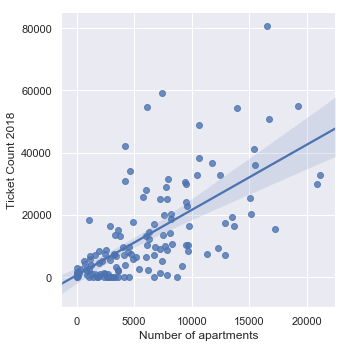

In [87]:
ax = sns.lmplot(data=population_zip_merge, x='Number of appartments', y='Ticket Count 2018')
ax.set(xlabel='Number of apartments')

In [88]:
population_zip_merge['Number of appartments'].corr(population_zip_merge['Ticket Count 2018'])

0.6582455114739048

### Income per household and the number of tickets

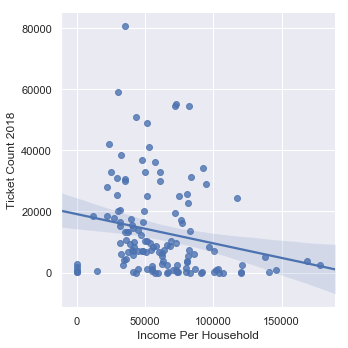

In [89]:
sns.lmplot(data=population_zip_merge, x='Income Per Household', y='Ticket Count 2018')

In [90]:
population_zip_merge['Income Per Household'].corr(population_zip_merge['Ticket Count 2018'])

-0.201949301156871

### The average house value and the number of tickets

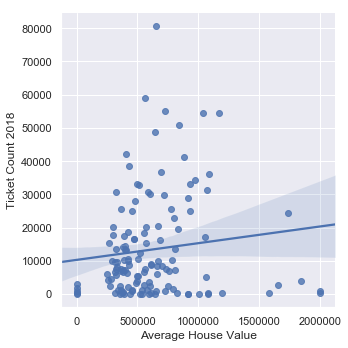

In [91]:
sns.lmplot(data=population_zip_merge, x='Average House Value', y='Ticket Count 2018')

In [92]:
population_zip_merge['Average House Value'].corr(population_zip_merge['Ticket Count 2018'])

0.1195072738213277

### The median age and the number of tickets

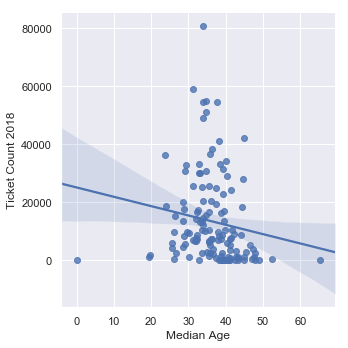

In [93]:
sns.lmplot(data=population_zip_merge, x='Median Age', y='Ticket Count 2018')

In [94]:
population_zip_merge['Median Age'].corr(population_zip_merge['Ticket Count 2018'])

-0.15426240328426347

### The population density and the number of tickets

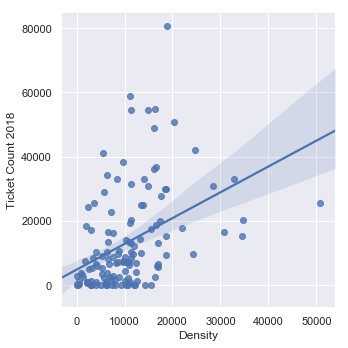

In [95]:
sns.lmplot(data=population_zip_merge, x='Density', y='Ticket Count 2018')

In [96]:
population_zip_merge['Density'].corr(population_zip_merge['Ticket Count 2018'])

0.41344813387992885

## Conclusions from the data above

From the visualization above, there are only a few factors that may influence the number of tickets given.
The one with the highest correlation coefficient is the number of appartments (0.65), followed by the population density (0.41) and the number of businesses (0.37)

Since the amount of data point we have is low, we may not conclude there is a strong correlation between the variables. In fact, the correlation seems to be weak.

To further explore the data, I have decided to enrich the data more. Previosuly, we have used the Zip code area for our metrics but the study area is quite large for Zip codes. There is something called a 'Census Tract' which is the smallest unit of which population data is available (https://en.wikipedia.org/wiki/Census_tract). 

Since a census tract area is more consistant, we may be able to see better results. The data about the walkability score of an area is using census tracts.

# Adding walkability score

The walkability score determines how easy it is to walk in the area. Many factors influencing the score include the residential density, retail density, intersection density, and land use mix. 

The higher the score, the more walkable the area is.

Using this data, I would like to see if there's a correlation between the score and the number of parking tickets given

The data is retrieved here: https://geohub.lacity.org/datasets/ladot::walkability-index-score-2012

The raw data is put into this folder:

`data/raw/Walkability_Index_Score_2012.geojson`

In [97]:
walk_index = gpd.read_file('data/raw/Walkability_Index_Score_2012.geojson')
walk_index.head()

,OBJECTID,TOT_SQFT,GEOID10,GEOID10_1,LU_Diversi,LUDiv_Z,Intersecti,Inter_Z,Ret_Den,Ret_Z,Res_Den,Res_Z,Walkabilit,Walkabil_1,geometry
0,1001,39545057,06037113102,06037113102,0.317,-0.762,90.953,-1.204,0.240,-0.470,1.936,-0.474,-2.910,-4.114,"POLYGON ((-118.569675967636 34.2733380028881, ..."
1,1002,19229823,06037113322,06037113322,0.341,-0.604,146.113,-0.586,0.210,-0.482,4.288,-0.446,-2.118,-2.704,"POLYGON ((-118.579833761369 34.2572550091154, ..."
2,1003,24429933,06037113301,06037113301,0.486,0.383,104.906,-1.048,1.261,-0.063,3.821,-0.452,-1.179,-2.227,"POLYGON ((-118.557963329039 34.2572647020184, ..."
3,1,61700812,06037106510,06037106510,0.287,-0.970,38.861,-1.787,0.323,-0.437,28.712,-0.158,-3.353,-5.140,"POLYGON ((-118.463720866552 34.3183988326247, ..."
4,2,22445154,06037106406,06037106406,0.453,0.161,142.847,-0.623,0.360,-0.422,7.836,-0.404,-1.288,-1.911,"POLYGON ((-118.459676590077 34.3300254738447, ..."


We are only interested in those fields:
- TOT_SQFT : Total Square Feet
- GEOID10 : Unique ID
- LU_Diversi : Land Use Mix
- Intersecti : Intersection Density (The amount of intersection in the area)
- Ret_Den : Retail Density
- Res_Den: Residential Density
- Walkabilit_1 : Walkability score (The website suggests us to use this field instead)
- geometry : Geolocation data


We will also convert the 'geometry' field to the correct projection used in parking ticket data

In [98]:
walk_index_clean = walk_index[['TOT_SQFT', 'GEOID10', 'LU_Diversi', 'Intersecti', 'Ret_Den', 'Res_Den', 'Walkabil_1', 'geometry']]

# Initial projection
walk_index_clean.crs = {'init' :'epsg:4326'}

# Converted projection
walk_index_clean = walk_index_clean.to_crs("+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")

walk_index_clean.head()

,TOT_SQFT,GEOID10,LU_Diversi,Intersecti,Ret_Den,Res_Den,Walkabil_1,geometry
0,39545057,06037113102,0.317,90.953,0.240,1.936,-4.114,"POLYGON ((6389561.806169027 1922342.665269677,..."
1,19229823,06037113322,0.341,146.113,0.210,4.288,-2.704,"POLYGON ((6386459.30549793 1916507.414659127, ..."
2,24429933,06037113301,0.486,104.906,1.261,3.821,-2.227,"POLYGON ((6393067.806444899 1916473.539375008,..."
3,61700812,06037106510,0.287,38.861,0.323,28.712,-5.140,"POLYGON ((6421647.310627236 1938576.415365099,..."
4,22445154,06037106406,0.453,142.847,0.360,7.836,-1.911,"POLYGON ((6422887.81079818 1942801.915511583, ..."


We will check the data types to make sure everything is consistent

In [99]:
walk_index_clean.dtypes

TOT_SQFT        int64
GEOID10        object
LU_Diversi    float64
Intersecti    float64
Ret_Den       float64
Res_Den       float64
Walkabil_1    float64
geometry       object
dtype: object

We will switch `GEOID10` to an integer

In [100]:
walk_index_clean['GEOID10'] = walk_index_clean['GEOID10'].astype('int64')
walk_index_clean.dtypes

TOT_SQFT        int64
GEOID10         int64
LU_Diversi    float64
Intersecti    float64
Ret_Den       float64
Res_Den       float64
Walkabil_1    float64
geometry       object
dtype: object

In order to know how many tickets were given in a single census tract, we will give each tickets in 2018 the correct `GEOID` of the area. Similar to what we did with the Zip code, we will used the rtree data structure for the association

In [101]:
idx = index.Index()

# Create spatial index
for i, r in walk_index_clean.iterrows():
    idx.insert(i, r['geometry'].bounds)
    
def point_is_in2(lat, long, geometry):
    p1 = Point(lat, long)
    try: # Added exception handling since this data outputs some errors
        poly = Polygon(geometry) #Changed from MultiPolygon to Polygon for this dataset
    except:
        return False
    return p1.within(poly)

def geometry_location_walk(lat, long):
    for x in list(idx.intersection((lat, long))):
        if point_is_in2(lat, long, walk_index_clean['geometry'][x]):
            return walk_index_clean['GEOID10'][x]
            break
    return -1 # If there are no Zip code associated with the ticket

*** Running the code below may take more than 10 minutes to complete ***

```
import time
start_time = time.time()

parking_data_clean_2018['GEOID10'] = parking_data_clean_2018.apply(lambda x: geometry_location_walk(x.Latitude, x.Longitude), axis=1)

# Checking actual run time
print("--- %s seconds ---" % (time.time() - start_time))
# --- 405.8987166881561 seconds ---

parking_data_clean_2018.to_csv('data/parking_data_clean_2018_zip_geoid.csv')
```

We have saved the output from above into a file for faster processing. We will load it back in.

In [102]:
parking_data_clean_2018 = pd.read_csv('data/parking_data_clean_2018_zip_geoid.csv')
parking_data_clean_2018 = parking_data_clean_2018.drop(columns='Unnamed: 0')
parking_data_clean_2018.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,...,Latitude,Longitude,Zip Code,norm_datetime,Weekday,Hour,Year,Month,Day,GEOID10
0,4320468924,2018-01-13,00:26:00,CA,MERZ,PA,BL,5033 LINCOLN AVE,56,80.69B,...,6499186.186,1866283.708,90042,2018-01-13 00:26:00,Saturday,0,2018,1,13,6037183401
1,4320468935,2018-01-13,00:27:00,CA,MERZ,PA,BL,5033 LINCOLN AVE,56,5200,...,6499186.186,1866283.708,90042,2018-01-13 00:27:00,Saturday,0,2018,1,13,6037183401
2,4320468946,2018-01-13,00:27:00,CA,FORD,PA,SL,5033 LINCOLN AVE,56,80.69B,...,6499186.186,1866283.708,90042,2018-01-13 00:27:00,Saturday,0,2018,1,13,6037183401
3,4320468950,2018-01-13,00:28:00,CA,FORD,PA,BL,5033 LINCOLN AVE,56,80.69B,...,6499186.186,1866283.708,90042,2018-01-13 00:28:00,Saturday,0,2018,1,13,6037183401
4,4320468961,2018-01-13,00:29:00,CA,TOYT,PA,BK,5033 LINCOLN AVE,56,80.69B,...,6499186.186,1866283.708,90042,2018-01-13 00:29:00,Saturday,0,2018,1,13,6037183401


## Cleaning GEOID

Our function that associates GEOID to parking tickets will return -1 if there are no match found. We will drop all the entries that contains -1 as a GEOID

In [103]:
len(parking_data_clean_2018[(parking_data_clean_2018['GEOID10'] == -1)])

2398

Dropping all -1

In [104]:
parking_data_clean_2018 = parking_data_clean_2018.drop(parking_data_clean_2018[parking_data_clean_2018['GEOID10'] == -1].index)

In [105]:
len(parking_data_clean_2018[(parking_data_clean_2018['GEOID10'] == -1)])

0

## Summing the amount of tickets for every GEOID

In [106]:
ticket_sum_walk = parking_data_clean_2018['GEOID10'].value_counts().rename_axis('GEOID10').reset_index(name='Ticket Count')
ticket_sum_walk.head()

,GEOID10,Ticket Count
0,6037226002,37739
1,6037207900,23604
2,6037207301,23489
3,6037190700,22968
4,6037190100,21954


In [107]:
len(ticket_sum_walk) # There are 999 GEOID with a ticket count

999

In [108]:
ticket_sum_walk.dtypes # Making sure that the data types are correct

GEOID10         int64
Ticket Count    int64
dtype: object

## Merging the sum to our data frame

We will use a left join since we may be interested in areas without parking tickets

In [109]:
walk_index_clean = walk_index_clean.merge(ticket_sum_walk, on='GEOID10', how='left')
walk_index_clean.head()

,TOT_SQFT,GEOID10,LU_Diversi,Intersecti,Ret_Den,Res_Den,Walkabil_1,geometry,Ticket Count
0,39545057,6037113102,0.317,90.953,0.240,1.936,-4.114,"POLYGON ((6389561.806169027 1922342.665269677,...",21.000
1,19229823,6037113322,0.341,146.113,0.210,4.288,-2.704,"POLYGON ((6386459.30549793 1916507.414659127, ...",355.000
2,24429933,6037113301,0.486,104.906,1.261,3.821,-2.227,"POLYGON ((6393067.806444899 1916473.539375008,...",82.000
3,61700812,6037106510,0.287,38.861,0.323,28.712,-5.140,"POLYGON ((6421647.310627236 1938576.415365099,...",182.000
4,22445154,6037106406,0.453,142.847,0.360,7.836,-1.911,"POLYGON ((6422887.81079818 1942801.915511583, ...",179.000


In [110]:
len(walk_index_clean)

1003

We check for null values

In [111]:
walk_index_clean.isnull().sum()

TOT_SQFT        0
GEOID10         0
LU_Diversi      0
Intersecti      0
Ret_Den         0
Res_Den         0
Walkabil_1      0
geometry        0
Ticket Count    4
dtype: int64

We replace all null values to 0. They are areas with no tickets.

In [112]:
walk_index_clean = walk_index_clean.fillna(0)
walk_index_clean.isnull().sum()

TOT_SQFT        0
GEOID10         0
LU_Diversi      0
Intersecti      0
Ret_Den         0
Res_Den         0
Walkabil_1      0
geometry        0
Ticket Count    0
dtype: int64

## Renaming columns

In [113]:
walk_index_clean = walk_index_clean.rename(columns={'LU_Diversi': 'Land Use Diversity',
                                                   'Intersecti': 'Intersection Density',
                                                   'TOT_SQFT': 'Total Square Feet',
                                                   'Ret_Den': 'Retail Density',
                                                   'Res_Den': 'Residential Density',
                                                   'Walkabil_1': 'Walkability Score'})
walk_index_clean.head()

,Total Square Feet,GEOID10,Land Use Diversity,Intersection Density,Retail Density,Residential Density,Walkability Score,geometry,Ticket Count
0,39545057,6037113102,0.317,90.953,0.240,1.936,-4.114,"POLYGON ((6389561.806169027 1922342.665269677,...",21.000
1,19229823,6037113322,0.341,146.113,0.210,4.288,-2.704,"POLYGON ((6386459.30549793 1916507.414659127, ...",355.000
2,24429933,6037113301,0.486,104.906,1.261,3.821,-2.227,"POLYGON ((6393067.806444899 1916473.539375008,...",82.000
3,61700812,6037106510,0.287,38.861,0.323,28.712,-5.140,"POLYGON ((6421647.310627236 1938576.415365099,...",182.000
4,22445154,6037106406,0.453,142.847,0.360,7.836,-1.911,"POLYGON ((6422887.81079818 1942801.915511583, ...",179.000


# Adding population data

Since we may also be interested in the population density of a census tract, we will add the population from the 2010 census.

The data can be retrieved here: http://geohub.lacity.org/datasets/census-tracts-2010-population/

The file is placed here: `data/raw/Census_Tracts_2010_Population.geojson`

In [114]:
pop_census = gpd.read_file('data/raw/Census_Tracts_2010_Population.geojson')
pop_census.head()

,OBJECTID,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,OTHPOP_D,...,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL,geometry
0,1,101110,4731,1324,2656,83,24,580,15,37,...,466,14,27,9,1734,1641,93,Tract: 1011.10\nTotal Population: 4731,navigatela/reports/census_tracts_2010.cfm?PK=1...,POLYGON ((-118.2942041566864 34.26289090945109...
1,2,101122,3664,575,2437,34,18,578,3,12,...,481,2,10,7,1369,1325,44,Tract: 1011.22\nTotal Population: 3664,navigatela/reports/census_tracts_2010.cfm?PK=1...,POLYGON ((-118.2899581573591 34.27813191171668...
2,3,101210,5990,2219,2890,192,16,625,16,15,...,537,13,11,12,2317,2150,167,Tract: 1012.10\nTotal Population: 5990,navigatela/reports/census_tracts_2010.cfm?PK=1...,POLYGON ((-118.2921191550502 34.25071190884022...
3,4,101220,3363,1272,1662,45,25,335,6,6,...,270,6,4,7,1317,1246,71,Tract: 1012.20\nTotal Population: 3363,navigatela/reports/census_tracts_2010.cfm?PK=1...,"POLYGON ((-118.2794601523556 34.2475709084817,..."
4,5,101300,4199,503,3190,47,26,402,10,10,...,329,9,9,8,1582,1542,40,Tract: 1013.00\nTotal Population: 4199,navigatela/reports/census_tracts_2010.cfm?PK=1...,POLYGON ((-118.2654201515742 34.25546591096638...


## Merging population data

We will merge the population data to `walk_index_clean`.

I noticed that GEOID10 is formatted as such: xxxxx(TRACTCE10)

5 digits followed by TRACTCE10 in `pop_census`

Since we are only interested in the overall population of the area, we will filter out the data frame.

In [115]:
pop_census = pop_census[['TRACTCE10', 'POP']]
pop_census = pop_census.rename(columns={'POP': 'Population'})
pop_census.head()

,TRACTCE10,Population
0,101110,4731
1,101122,3664
2,101210,5990
3,101220,3363
4,101300,4199


In order to correctly merge the data and using TRACTCE10 as a key, we first convert both `GEOID10` in `walk_index_clean` and `TRACTCE10` in `pop_census` to a string.

In [116]:
walk_index_clean['GEOID10'] = walk_index_clean['GEOID10'].astype(str)
pop_census['TRACTCE10'] = pop_census['TRACTCE10'].astype(str)

In [117]:
walk_index_clean.dtypes

Total Square Feet         int64
GEOID10                  object
Land Use Diversity      float64
Intersection Density    float64
Retail Density          float64
Residential Density     float64
Walkability Score       float64
geometry                 object
Ticket Count            float64
dtype: object

In [118]:
pop_census.dtypes

TRACTCE10     object
Population     int64
dtype: object

In [119]:
len(pop_census)

1012

We can now merge both data. We will create a new `TRACTCE10` for `walk_index_clean` for easier merging

In [120]:
walk_index_clean['TRACTCE10'] = walk_index_clean['GEOID10'].str[4:]
walk_index_clean.head()

,Total Square Feet,GEOID10,Land Use Diversity,Intersection Density,Retail Density,Residential Density,Walkability Score,geometry,Ticket Count,TRACTCE10
0,39545057,6037113102,0.317,90.953,0.240,1.936,-4.114,"POLYGON ((6389561.806169027 1922342.665269677,...",21.000,113102
1,19229823,6037113322,0.341,146.113,0.210,4.288,-2.704,"POLYGON ((6386459.30549793 1916507.414659127, ...",355.000,113322
2,24429933,6037113301,0.486,104.906,1.261,3.821,-2.227,"POLYGON ((6393067.806444899 1916473.539375008,...",82.000,113301
3,61700812,6037106510,0.287,38.861,0.323,28.712,-5.140,"POLYGON ((6421647.310627236 1938576.415365099,...",182.000,106510
4,22445154,6037106406,0.453,142.847,0.360,7.836,-1.911,"POLYGON ((6422887.81079818 1942801.915511583, ...",179.000,106406


In [121]:
walk_index_clean = walk_index_clean.merge(pop_census, on='TRACTCE10', how='left')
walk_index_clean.head()

,Total Square Feet,GEOID10,Land Use Diversity,Intersection Density,Retail Density,Residential Density,Walkability Score,geometry,Ticket Count,TRACTCE10,Population
0,39545057,6037113102,0.317,90.953,0.240,1.936,-4.114,"POLYGON ((6389561.806169027 1922342.665269677,...",21.000,113102,2828.000
1,19229823,6037113322,0.341,146.113,0.210,4.288,-2.704,"POLYGON ((6386459.30549793 1916507.414659127, ...",355.000,113322,3947.000
2,24429933,6037113301,0.486,104.906,1.261,3.821,-2.227,"POLYGON ((6393067.806444899 1916473.539375008,...",82.000,113301,2201.000
3,61700812,6037106510,0.287,38.861,0.323,28.712,-5.140,"POLYGON ((6421647.310627236 1938576.415365099,...",182.000,106510,5108.000
4,22445154,6037106406,0.453,142.847,0.360,7.836,-1.911,"POLYGON ((6422887.81079818 1942801.915511583, ...",179.000,106406,4962.000


## Checking for null values and replacing them with 0

Areas with NaN as values have no population

In [122]:
walk_index_clean.isnull().sum()

Total Square Feet       0
GEOID10                 0
Land Use Diversity      0
Intersection Density    0
Retail Density          0
Residential Density     0
Walkability Score       0
geometry                0
Ticket Count            0
TRACTCE10               0
Population              1
dtype: int64

In [123]:
walk_index_clean = walk_index_clean.fillna(0)

In [124]:
walk_index_clean.isnull().sum()

Total Square Feet       0
GEOID10                 0
Land Use Diversity      0
Intersection Density    0
Retail Density          0
Residential Density     0
Walkability Score       0
geometry                0
Ticket Count            0
TRACTCE10               0
Population              0
dtype: int64

## Calculating population density

We will calculate the density by using square miles instead of square feet. We will need to do some unit conversion.

In [125]:
walk_index_clean['Density'] = np.divide(walk_index_clean['Population'], np.multiply(walk_index_clean['Total Square Feet'], 0.00000003587))
walk_index_clean.head()

,Total Square Feet,GEOID10,Land Use Diversity,Intersection Density,Retail Density,Residential Density,Walkability Score,geometry,Ticket Count,TRACTCE10,Population,Density
0,39545057,6037113102,0.317,90.953,0.240,1.936,-4.114,"POLYGON ((6389561.806169027 1922342.665269677,...",21.000,113102,2828.000,1993.682
1,19229823,6037113322,0.341,146.113,0.210,4.288,-2.704,"POLYGON ((6386459.30549793 1916507.414659127, ...",355.000,113322,3947.000,5722.166
2,24429933,6037113301,0.486,104.906,1.261,3.821,-2.227,"POLYGON ((6393067.806444899 1916473.539375008,...",82.000,113301,2201.000,2511.692
3,61700812,6037106510,0.287,38.861,0.323,28.712,-5.140,"POLYGON ((6421647.310627236 1938576.415365099,...",182.000,106510,5108.000,2307.962
4,22445154,6037106406,0.453,142.847,0.360,7.836,-1.911,"POLYGON ((6422887.81079818 1942801.915511583, ...",179.000,106406,4962.000,6163.151


Checking the density values

In [126]:
walk_index_clean['Density'].describe()

count    1003.000
mean    16616.680
std     13446.529
min         0.000
25%      7948.426
50%     13450.549
75%     21066.561
max     94490.272
Name: Density, dtype: float64

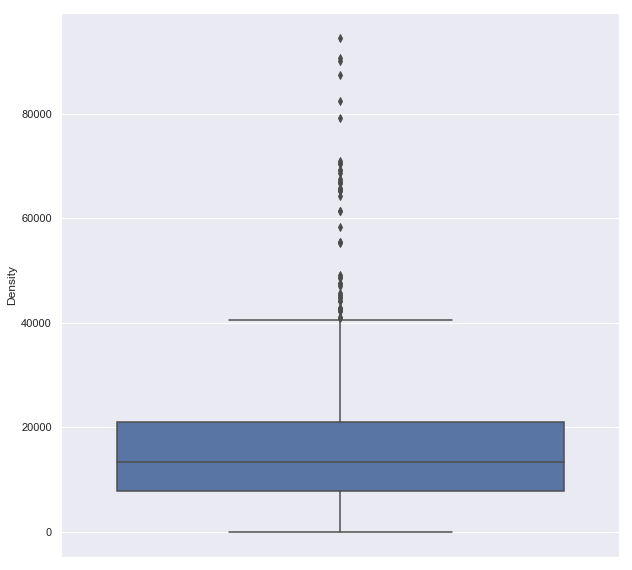

In [127]:
sns.boxplot(walk_index_clean['Density'], orient='v')

Many values are outliers because some census tract areas are quite small

# Further bivariate analysis

We are now working with ~1000 data points. We will show the graph and the Pearson correlation coefficient

### Walkability score and the number of tickets

0.3760076146863337

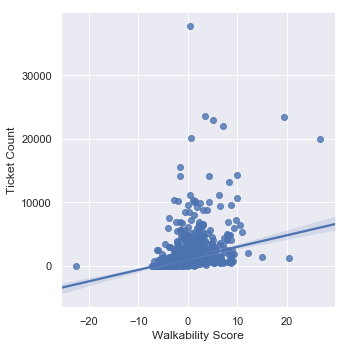

In [128]:
sns.lmplot(data=walk_index_clean, x='Walkability Score', y='Ticket Count', robust=True)
walk_index_clean['Walkability Score'].corr(walk_index_clean['Ticket Count'])

### Population density and the number of tickets

0.02802312206671375

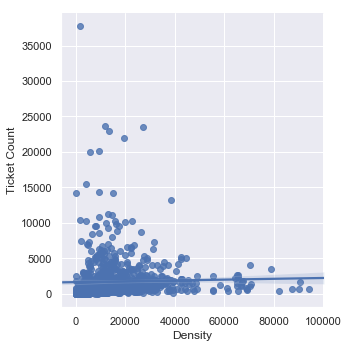

In [129]:
sns.lmplot(data=walk_index_clean, x='Density', y='Ticket Count')
walk_index_clean['Density'].corr(walk_index_clean['Ticket Count'])

### Population and the number of tickets

-0.02443187118119315

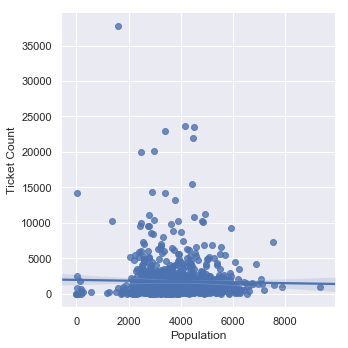

In [130]:
sns.lmplot(data=walk_index_clean, x='Population', y='Ticket Count')
walk_index_clean['Population'].corr(walk_index_clean['Ticket Count'])

### Retail density and the number of tickets

0.3312113167891545

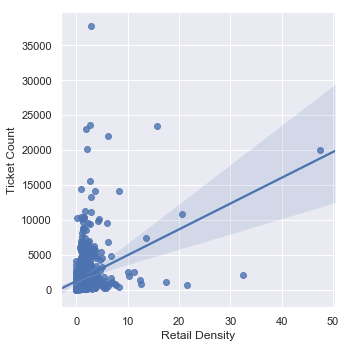

In [131]:
sns.lmplot(data=walk_index_clean, x='Retail Density', y='Ticket Count')
walk_index_clean['Retail Density'].corr(walk_index_clean['Ticket Count'])

### Residential density and the number of tickets

0.3586011659722262

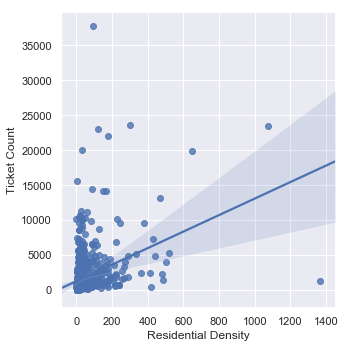

In [132]:
sns.lmplot(data=walk_index_clean, x='Residential Density', y='Ticket Count')
walk_index_clean['Residential Density'].corr(walk_index_clean['Ticket Count'])

###  Intersection density and the number of tickets

0.2364005982824151

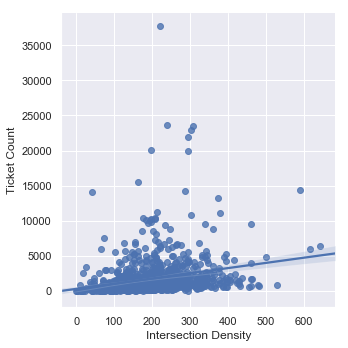

In [133]:
sns.lmplot(data=walk_index_clean, x='Intersection Density', y='Ticket Count')
walk_index_clean['Intersection Density'].corr(walk_index_clean['Ticket Count'])

### Land use diversity and the number of tickets

0.1249259100865517

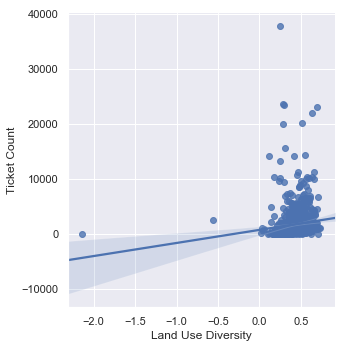

In [134]:
sns.lmplot(data=walk_index_clean, x='Land Use Diversity', y='Ticket Count')
walk_index_clean['Land Use Diversity'].corr(walk_index_clean['Ticket Count'])

### Heatmap of the walkability score

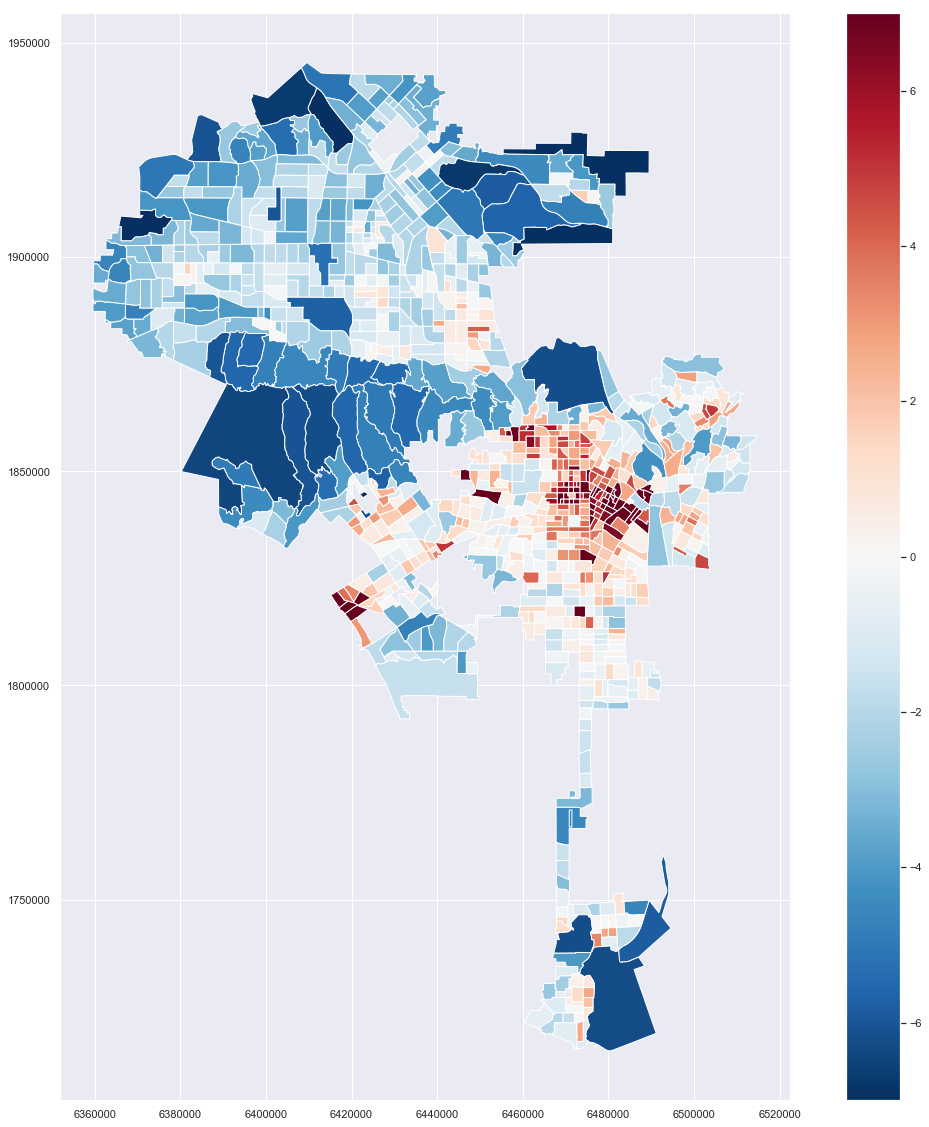

In [135]:
walk_index_clean.plot(column='Walkability Score', figsize=(20,20), legend=True, cmap='RdBu_r', vmin=-7, vmax=7)

### Heatmap of parking tickets

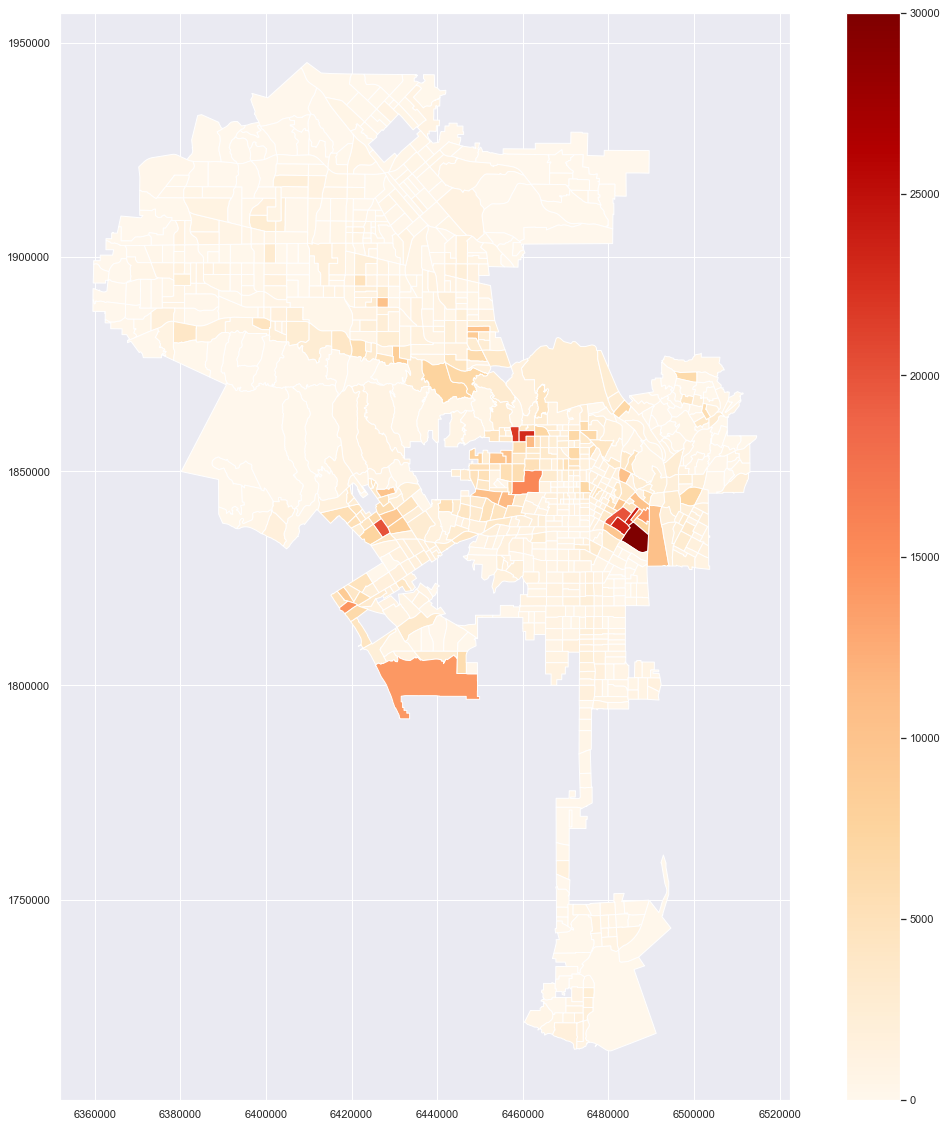

In [136]:
walk_index_clean.plot(column='Ticket Count', figsize=(20,20), legend=True, cmap='OrRd', vmin=0, vmax=30000)

### Heatmap for the population density

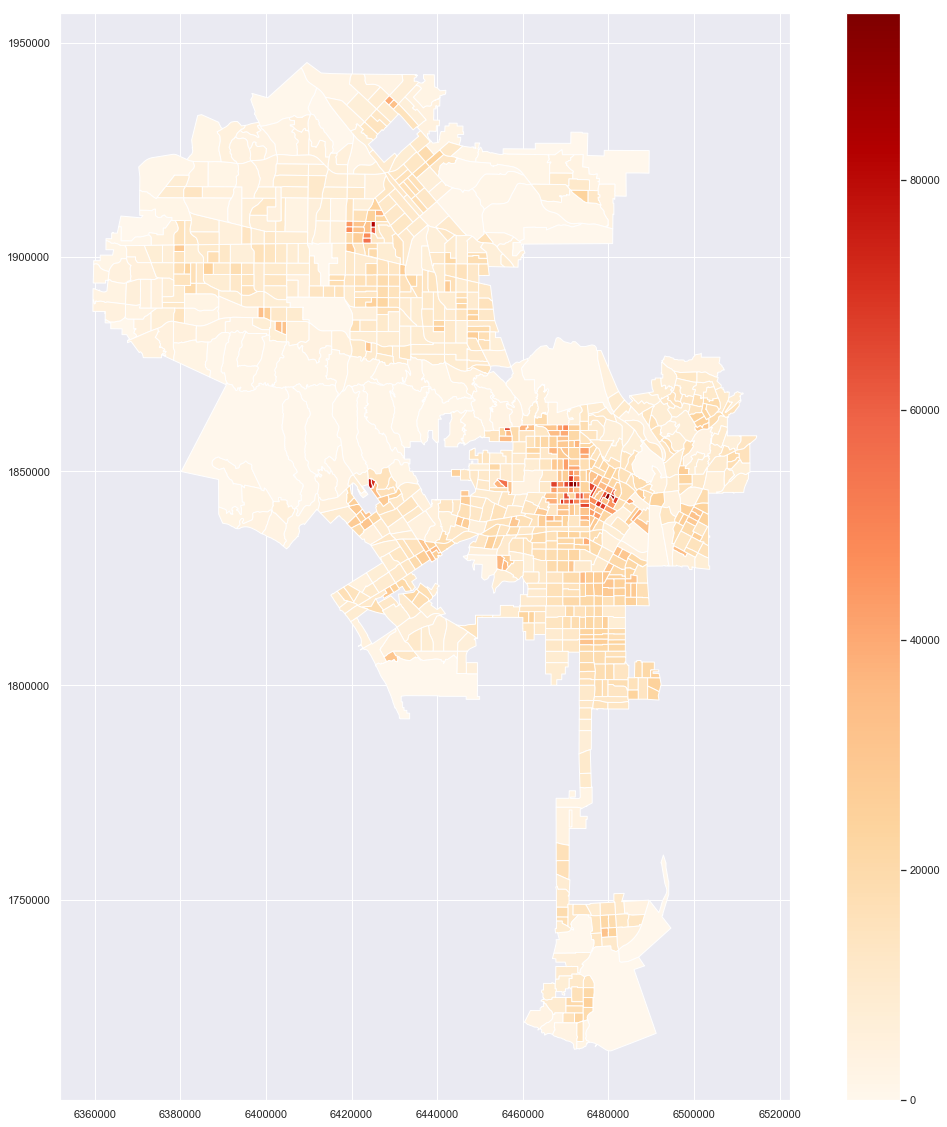

In [137]:
walk_index_clean.plot(column='Density', figsize=(20,20), legend=True, cmap='OrRd')

### Heatmap for the population

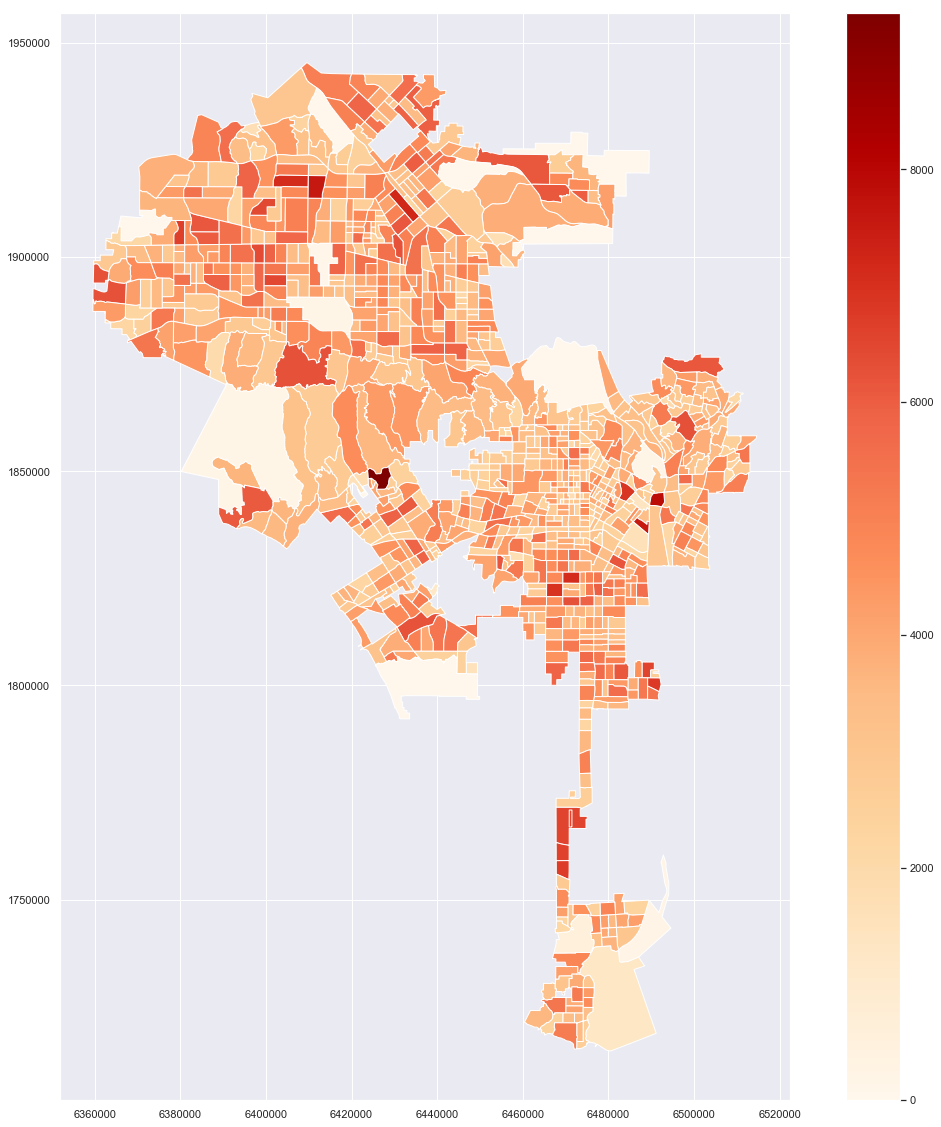

In [138]:
walk_index_clean.plot(column='Population', figsize=(20,20), legend=True, cmap='OrRd')

# Conclusion

There are no correlation between the number of tickets given and the population density. The same is for urban factors such as the number of homes, number of apartments, and the walkability score.

Other factors that may influence the number of parking tickets would be the traffic density but this data is not available.

Another interesting aspect that we may explore would be the touristic areas.

# Further actions

Although there are no correlation found between our features and the amount of parking tickets, we can advise the city of Los Angeles to enact a few changes to their parking policies such as revising their street sweeping hours, offer free parking for the displaced cars, and increase the frequency of public transit to areas that has to most tickets.